<a href="https://colab.research.google.com/github/Addechander/Exploratory-Data-Analysis/blob/main/prophet_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pm = pd.read_csv('/content/drive/MyDrive/ff_pm.csv')
ff = pd.read_csv('/content/drive/MyDrive/forest_data_outliers.csv')

In [5]:
pm

date  Particulate_Matter_2.5  year month  day
0     2017-03-23                   145.0  2017   Mar   23
1     2017-03-24                   149.0  2017   Mar   24
2     2017-03-25                   104.0  2017   Mar   25
3     2017-03-26                   159.0  2017   Mar   26
4     2017-03-27                   158.0  2017   Mar   27
...          ...                     ...   ...   ...  ...
2111  2023-05-29                    82.0  2023   May   29
2112  2023-05-30                    85.0  2023   May   30
2113  2023-05-31                    87.0  2023   May   31
2114  2023-06-01                    96.0  2023   Jun    1
2115  2023-06-02                   116.0  2023   Jun    2

[2116 rows x 5 columns]

In [6]:
pm_resampled = pm.copy()

pm_resampled['date'] = pd.to_datetime(pm_resampled['date'])

In [7]:
pm_resampled.set_index('date', inplace = True)

In [8]:
pm_resampled = pm_resampled.resample('W-MON').mean()

In [9]:
ff['date'] = pd.to_datetime(ff['date'])

In [10]:
ff

Unnamed: 0       date     h      n
0             0 2012-01-02   0.0    3.0
1             1 2012-01-16   0.0    2.0
2             2 2012-01-23   5.0   20.0
3             3 2012-01-30   3.0   38.0
4             4 2012-02-06   0.0   19.0
..          ...        ...   ...    ...
301         359 2023-02-13   4.0  177.0
302         360 2023-02-20   3.0   93.0
303         361 2023-02-27   2.0  112.0
304         364 2023-03-20  12.0  159.0
305         369 2023-04-24   0.0  124.0

[306 rows x 4 columns]

In [11]:
ff.drop('Unnamed: 0', axis = 1, inplace = True)

In [12]:
ff

date     h      n
0   2012-01-02   0.0    3.0
1   2012-01-16   0.0    2.0
2   2012-01-23   5.0   20.0
3   2012-01-30   3.0   38.0
4   2012-02-06   0.0   19.0
..         ...   ...    ...
301 2023-02-13   4.0  177.0
302 2023-02-20   3.0   93.0
303 2023-02-27   2.0  112.0
304 2023-03-20  12.0  159.0
305 2023-04-24   0.0  124.0

[306 rows x 3 columns]

In [13]:
df_merged = pd.merge(pm_resampled, ff, on = 'date', how = 'inner')

In [14]:
df_merged.to_csv('forest_and_pm.csv')

In [15]:
df_merged.shape

(168, 6)

In [16]:
df_merged.tail(60)

date  Particulate_Matter_2.5         year        day     h      n
108 2021-02-22              130.000000  2021.000000  19.000000   6.0   75.0
109 2021-03-08              147.428571  2021.000000   5.000000   2.0  111.0
110 2021-05-03              127.428571  2021.000000  17.142857   0.0    3.0
111 2021-05-10               86.857143  2021.000000   7.000000   0.0   21.0
112 2021-05-17               72.285714  2021.000000  14.000000   1.0    9.0
113 2021-05-24               71.428571  2021.000000  21.000000   0.0    7.0
114 2021-05-31               40.857143  2021.000000  28.000000   0.0    1.0
115 2021-07-19               40.428571  2021.000000  16.000000   0.0    1.0
116 2021-10-04               43.571429  2021.000000  13.857143   0.0    1.0
117 2021-10-11               63.714286  2021.000000   8.000000   0.0    2.0
118 2021-11-01               86.428571  2021.000000  24.571429   0.0    2.0
119 2021-11-08               92.571429  2021.000000   5.000000   0.0    1.0
120 2021-11-15               82.000000  2021.000000  12.000000   0.0    3.0
121 2021-11-22              108.142857  2021.000000  19.000000   0.0   32.0
122 2021-11-29              148.428571  2021.000000  26.000000   0.0   37.0
123 2021-12-06              114.000000  2021.000000   7.285714   1.0   13.0
124 2021-12-13              122.428571  2021.000000  10.000000   0.0    6.0
125 2021-12-20              142.000000  2021.000000  17.000000   0.0    5.0
126 2022-01-03              148.000000  2021.428571  17.714286   0.0   18.0
127 2022-01-10              135.714286  2022.000000   7.000000   0.0    7.0
128 2022-01-24              141.571429  2022.000000  21.000000   0.0    6.0
129 2022-01-31              143.714286  2022.000000  28.000000   0.0    8.0
130 2022-02-07              126.857143  2022.000000   4.000000   0.0   10.0
131 2022-02-14              117.285714  2022.000000  11.000000   0.0   22.0
132 2022-02-21              126.714286  2022.000000  18.000000   0.0   30.0
133 2022-02-28              125.857143  2022.000000  25.000000   2.0   44.0
134 2022-03-07              132.714286  2022.000000   4.000000   2.0   49.0
135 2022-03-14              125.285714  2022.000000  11.000000   5.0  149.0
136 2022-03-28              148.000000  2022.000000  24.400000   0.0   35.0
137 2022-04-04              158.000000  2022.000000  14.285714   0.0   57.0
138 2022-04-18              130.428571  2022.000000  15.000000   2.0  156.0
139 2022-04-25              136.285714  2022.000000  22.000000   0.0   85.0
140 2022-05-09               73.800000  2022.000000   6.600000   0.0    3.0
141 2022-05-23               85.428571  2022.000000  20.000000   0.0    0.0
142 2022-05-30               87.714286  2022.000000  27.000000   0.0    1.0
143 2022-07-11               48.142857  2022.000000   8.000000   0.0    1.0
144 2022-09-26               48.571429  2022.000000  23.000000   0.0    1.0
145 2022-10-03               56.000000  2022.000000  17.142857   0.0    1.0
146 2022-10-10               27.000000  2022.000000   7.000000   0.0    1.0
147 2022-10-17               42.714286  2022.000000  14.000000   0.0    3.0
148 2022-10-24               80.857143  2022.000000  21.000000   0.0    2.0
149 2022-10-31               88.714286  2022.000000  28.000000   0.0    4.0
150 2022-11-07               90.285714  2022.000000   4.000000   0.0    2.0
151 2022-11-14              106.571429  2022.000000  11.000000   0.0   10.0
152 2022-11-21              126.857143  2022.000000  18.000000   0.0   48.0
153 2022-11-28              113.428571  2022.000000  25.000000   2.0   72.0
154 2022-12-05              118.571429  2022.000000  10.571429   0.0   22.0
155 2022-12-12              121.714286  2022.000000   9.000000   2.0   13.0
156 2022-12-19              147.428571  2022.000000  16.000000   0.0   12.0
157 2022-12-26              138.285714  2022.000000  23.000000   1.0   23.0
158 2023-01-02              151.333333  2022.000000  28.000000   0.0   36.0
159 2023-01-09              162.571429  2023.000000   6.00

In [17]:
nobs = 30
df_train, df_test = df_merged[0:-nobs], df_merged[-nobs:]
df_new = df_train

In [18]:
df_train = df_train.rename(columns = {'Particulate_Matter_2.5': 'y', 'date': 'ds'})

In [19]:
model = Prophet(mcmc_samples=400,changepoint_prior_scale = 0.001, seasonality_mode='multiplicative', \
              weekly_seasonality=False, daily_seasonality=False,\
                )



In [20]:
model.add_regressor('h', mode='multiplicative')
model.add_regressor('n', mode='multiplicative')

In [21]:
model.fit(df_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/c2a2n45p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/1mf26xix.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:27:31 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7268', 'data', 'file=/tmp/tmp6c66i0sk/c2a2n45p.json', 'init=/tmp/tmp6c66i0sk/1mf26xix.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelqbgyvwr6/prophet_model-20230731162731_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=7268', 'data', 'file=/tmp/tmp6c66i0sk/c2a2n45p.json', 'init=/tmp/tmp6c66i0sk/1mf26xix.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelqbgyvwr6/prophet_model-20230731162731_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

16:28:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7268', 'data', 'file=/tmp/tmp6c66i0sk/c2a2n45p.json', 'init=/tmp/tmp6c66i0sk/1mf26xix.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelqbgyvwr6/prophet_model-20230731162731_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelqbgyvwr6/prophet_model-20230731162731_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelqbgyvwr6/prophet_model-20230731162731_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

In [22]:
future = model.make_future_dataframe(periods = 30, freq = 'D')

In [23]:
df_new = df_new.append(df_test)
df_new = df_new.rename(columns = {'Particulate_Matter_2.5': 'y', 'date':'ds'})


In [24]:
future = df_new[['ds', 'h', 'n']]

future.head()

ds    h     n
0 2017-03-27  0.0  21.0
1 2017-04-17  0.0  83.0
2 2017-05-01  0.0  38.0
3 2017-05-15  0.0   2.0
4 2017-05-22  0.0   4.0

In [25]:
forecast = model.predict(future)

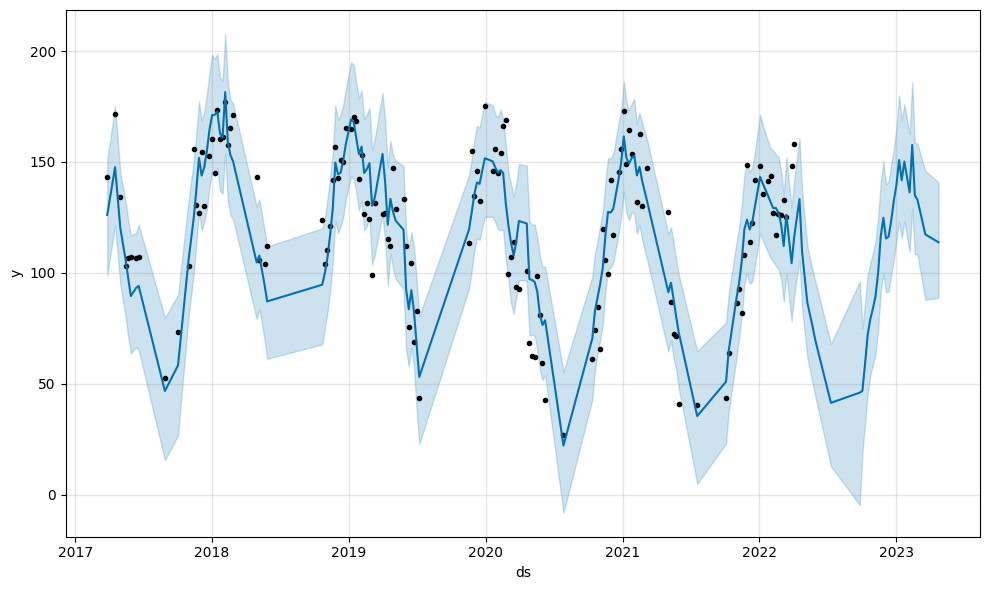

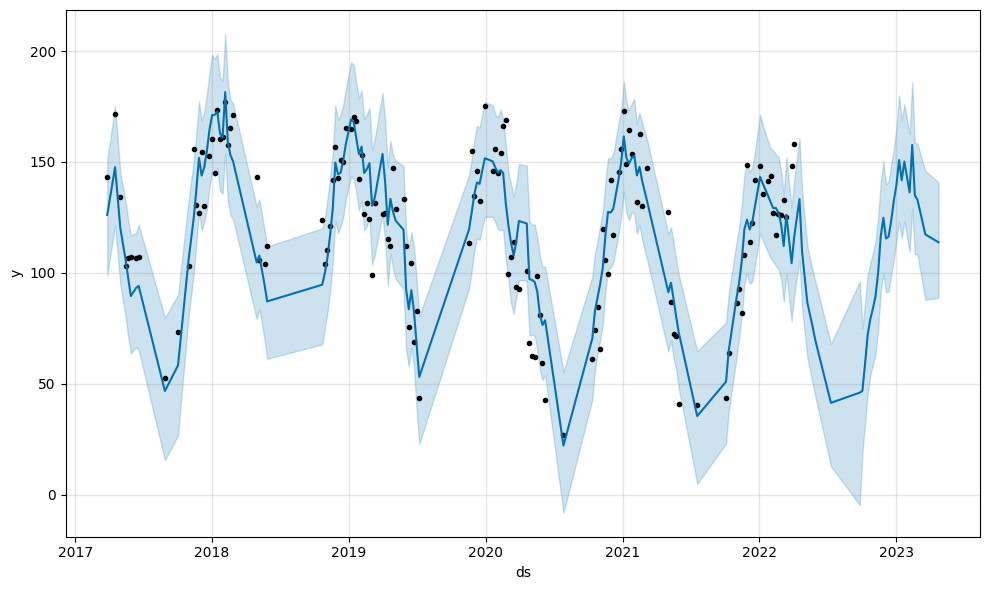

In [26]:
model.plot(forecast)

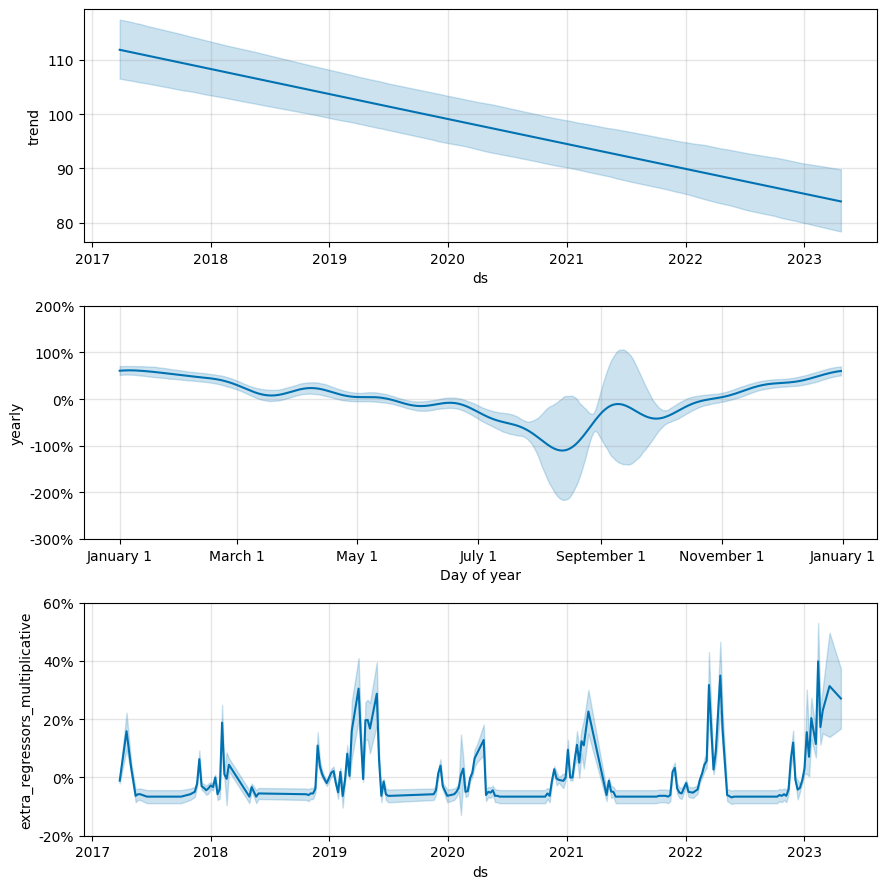

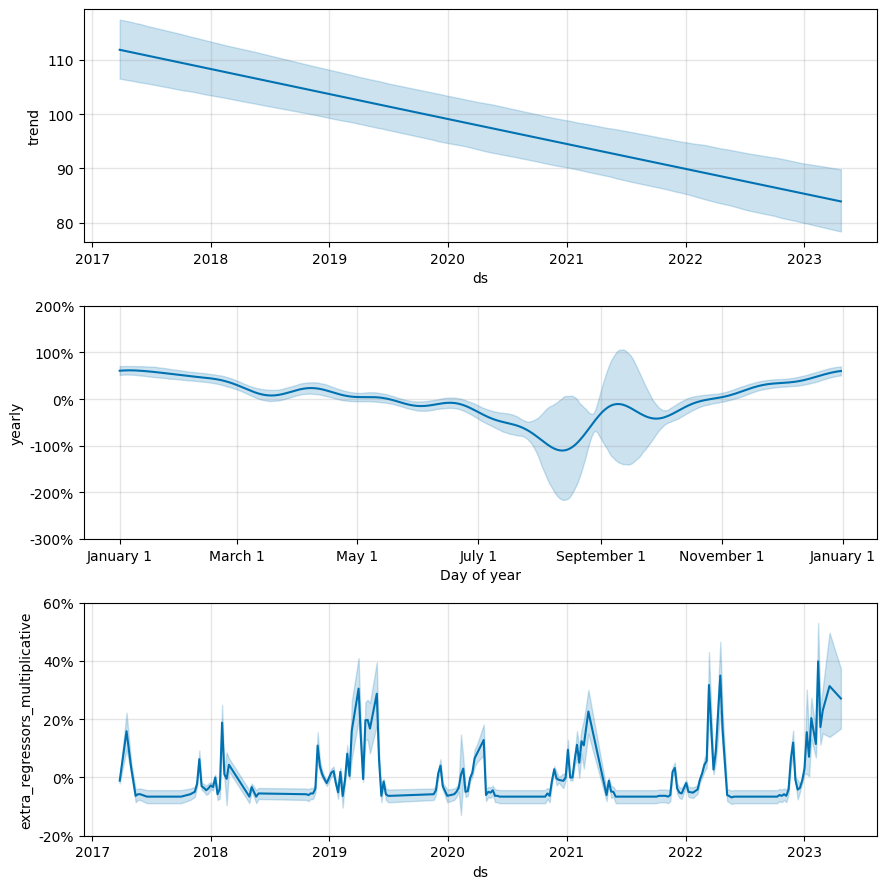

In [27]:
model.plot_components(forecast)

In [28]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

accuracy = forecast_accuracy(df_test['Particulate_Matter_2.5'].values, forecast[-nobs:]['yhat'].values)

In [29]:
accuracy

{'mape': nan,
 'me': nan,
 'mae': nan,
 'mpe': nan,
 'rmse': nan,
 'corr': nan,
 'minmax': nan}

In [30]:
forecast[-nobs:]

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
138 2022-04-18  88.580573  105.789525  160.747872    83.578220    93.713838   
139 2022-04-25  88.492680   83.928931  137.246644    83.493866    93.649730   
140 2022-05-09  88.316896   61.929818  112.060398    83.313703    93.524374   
141 2022-05-23  88.141111   50.050679  101.204601    83.117862    93.364155   
142 2022-05-30  88.053219   44.565299   96.558951    82.997124    93.284889   
143 2022-07-11  87.525866   12.786930   67.932962    82.281989    92.799194   
144 2022-09-26  86.559051   -4.793225   96.095952    81.329317    92.042350   
145 2022-10-03  86.471159   18.947418   74.811201    81.246221    92.000608   
146 2022-10-10  86.383267   31.557081   86.794191    81.105081    91.941203   
147 2022-10-17  86.295374   45.204622   98.916329    80.983549    91.849011   
148 2022-10-24  86.207482   53.677968  104.265064    80.876262    91.765816   
149 2022-10-31  86.119590   58.513176  108.847575    80.782534    91.691291   
150 2022-11-07  86.031698   63.192448  114.232831    80.681411    91.604670   
151 2022-11-14  85.943806   74.197176  124.768738    80.599524    91.511480   
152 2022-11-21  85.855913   91.685339  141.066211    80.516595    91.420642   
153 2022-11-28  85.768021   99.645185  150.242363    80.432455    91.327722   
154 2022-12-05  85.680129   91.203904  139.990053    80.348315    91.232645   
155 2022-12-12  85.592237   91.511066  141.000597    80.252723    91.141526   
156 2022-12-19  85.504344   99.268679  149.238541    80.149932    91.056260   
157 2022-12-26  85.416452  105.750973  155.748610    80.040365    90.973237   
158 2023-01-02  85.328560  114.869572  165.884063    79.953119    90.894921   
159 2023-01-09  85.240668  123.070608  179.971266    79.864890    90.832915   
160 2023-01-16  85.152775  115.445389  168.765875    79.757079    90.771061   
161 2023-01-23  85.064883  123.258919  176.084499    79.649427    90.709359   
162 2023-02-06  84.889099  109.271420  162.560637    79.458190    90.579877   
163 2023-02-13  84.801206  128.914251  185.976295    79.362038    90.512027   
164 2023-02-20  84.713314  108.430447  158.609706    79.261547    90.450617   
165 2023-02-27  84.625422  108.057937  158.246306    79.159981    90.389105   
166 2023-03-20  84.361745   87.886459  145.982470    78.864634    90.171528   
167 2023-04-24  83.922284   88.707902  140.821990    78.383180    89.833897   

     extra_regressors_multiplicative  extra_regressors_multiplicative_lower  \
138                         0.349769                               0.229353   
139                         0.164202                               0.100173   
140                        -0.060328                              -0.081125   
141                        -0.068542                              -0.091471   
142                        -0.065804                              -0.088309   
143                        -0.065804                              -0.088309   
144                        -0.065804                              -0.088309   
145                        -0.065804                              -0.088309   
146                        -0.065804                              -0.088309   
147                        -0.060328                              -0.081125   
148                        -0.063066                              -0.085029   
149                        -0.057589                              -0.077230   
150                        -0.063066                              -0.085029   
151                        -0.041160                              -0.056235   
152                         0.062890                               0.034582   
153                         0.119763                               0.078584   
154                        -0.008302                              -0.018043   
155                        -0.041788                              -0.075281   
156                        -0.035684                         

In [31]:
forecast_new = forecast[-nobs:]
forecast_new = forecast_new.loc[(forecast_new['ds'] != '2023-02-20') & (forecast_new['ds'] != '2023-02-27')]



In [32]:
forecast_new

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
138 2022-04-18  88.580573  105.789525  160.747872    83.578220    93.713838   
139 2022-04-25  88.492680   83.928931  137.246644    83.493866    93.649730   
140 2022-05-09  88.316896   61.929818  112.060398    83.313703    93.524374   
141 2022-05-23  88.141111   50.050679  101.204601    83.117862    93.364155   
142 2022-05-30  88.053219   44.565299   96.558951    82.997124    93.284889   
143 2022-07-11  87.525866   12.786930   67.932962    82.281989    92.799194   
144 2022-09-26  86.559051   -4.793225   96.095952    81.329317    92.042350   
145 2022-10-03  86.471159   18.947418   74.811201    81.246221    92.000608   
146 2022-10-10  86.383267   31.557081   86.794191    81.105081    91.941203   
147 2022-10-17  86.295374   45.204622   98.916329    80.983549    91.849011   
148 2022-10-24  86.207482   53.677968  104.265064    80.876262    91.765816   
149 2022-10-31  86.119590   58.513176  108.847575    80.782534    91.691291   
150 2022-11-07  86.031698   63.192448  114.232831    80.681411    91.604670   
151 2022-11-14  85.943806   74.197176  124.768738    80.599524    91.511480   
152 2022-11-21  85.855913   91.685339  141.066211    80.516595    91.420642   
153 2022-11-28  85.768021   99.645185  150.242363    80.432455    91.327722   
154 2022-12-05  85.680129   91.203904  139.990053    80.348315    91.232645   
155 2022-12-12  85.592237   91.511066  141.000597    80.252723    91.141526   
156 2022-12-19  85.504344   99.268679  149.238541    80.149932    91.056260   
157 2022-12-26  85.416452  105.750973  155.748610    80.040365    90.973237   
158 2023-01-02  85.328560  114.869572  165.884063    79.953119    90.894921   
159 2023-01-09  85.240668  123.070608  179.971266    79.864890    90.832915   
160 2023-01-16  85.152775  115.445389  168.765875    79.757079    90.771061   
161 2023-01-23  85.064883  123.258919  176.084499    79.649427    90.709359   
162 2023-02-06  84.889099  109.271420  162.560637    79.458190    90.579877   
163 2023-02-13  84.801206  128.914251  185.976295    79.362038    90.512027   
166 2023-03-20  84.361745   87.886459  145.982470    78.864634    90.171528   
167 2023-04-24  83.922284   88.707902  140.821990    78.383180    89.833897   

     extra_regressors_multiplicative  extra_regressors_multiplicative_lower  \
138                         0.349769                               0.229353   
139                         0.164202                               0.100173   
140                        -0.060328                              -0.081125   
141                        -0.068542                              -0.091471   
142                        -0.065804                              -0.088309   
143                        -0.065804                              -0.088309   
144                        -0.065804                              -0.088309   
145                        -0.065804                              -0.088309   
146                        -0.065804                              -0.088309   
147                        -0.060328                              -0.081125   
148                        -0.063066                              -0.085029   
149                        -0.057589                              -0.077230   
150                        -0.063066                              -0.085029   
151                        -0.041160                              -0.056235   
152                         0.062890                               0.034582   
153                         0.119763                               0.078584   
154                        -0.008302                              -0.018043   
155                        -0.041788                              -0.075281   
156                        -0.035684                              -0.048831   
157                        -0.009986                              -0.018798   
158                         0.030032                         

In [33]:
test = df_test.dropna()
test

date  Particulate_Matter_2.5    year        day     h      n
138 2022-04-18              130.428571  2022.0  15.000000   2.0  156.0
139 2022-04-25              136.285714  2022.0  22.000000   0.0   85.0
140 2022-05-09               73.800000  2022.0   6.600000   0.0    3.0
141 2022-05-23               85.428571  2022.0  20.000000   0.0    0.0
142 2022-05-30               87.714286  2022.0  27.000000   0.0    1.0
143 2022-07-11               48.142857  2022.0   8.000000   0.0    1.0
144 2022-09-26               48.571429  2022.0  23.000000   0.0    1.0
145 2022-10-03               56.000000  2022.0  17.142857   0.0    1.0
146 2022-10-10               27.000000  2022.0   7.000000   0.0    1.0
147 2022-10-17               42.714286  2022.0  14.000000   0.0    3.0
148 2022-10-24               80.857143  2022.0  21.000000   0.0    2.0
149 2022-10-31               88.714286  2022.0  28.000000   0.0    4.0
150 2022-11-07               90.285714  2022.0   4.000000   0.0    2.0
151 2022-11-14              106.571429  2022.0  11.000000   0.0   10.0
152 2022-11-21              126.857143  2022.0  18.000000   0.0   48.0
153 2022-11-28              113.428571  2022.0  25.000000   2.0   72.0
154 2022-12-05              118.571429  2022.0  10.571429   0.0   22.0
155 2022-12-12              121.714286  2022.0   9.000000   2.0   13.0
156 2022-12-19              147.428571  2022.0  16.000000   0.0   12.0
157 2022-12-26              138.285714  2022.0  23.000000   1.0   23.0
158 2023-01-02              151.333333  2022.0  28.000000   0.0   36.0
159 2023-01-09              162.571429  2023.0   6.000000  10.0   98.0
160 2023-01-16              147.166667  2023.0  13.333333   5.0   59.0
161 2023-01-23              159.285714  2023.0  20.000000   1.0  101.0
162 2023-02-06              157.571429  2023.0   7.428571   0.0   67.0
163 2023-02-13              157.750000  2023.0   8.500000   4.0  177.0
166 2023-03-20              130.857143  2023.0  17.000000  12.0  159.0
167 2023-04-24              157.285714  2023.0  21.000000   0.0  124.0

In [34]:
df_test

date  Particulate_Matter_2.5    year        day     h      n
138 2022-04-18              130.428571  2022.0  15.000000   2.0  156.0
139 2022-04-25              136.285714  2022.0  22.000000   0.0   85.0
140 2022-05-09               73.800000  2022.0   6.600000   0.0    3.0
141 2022-05-23               85.428571  2022.0  20.000000   0.0    0.0
142 2022-05-30               87.714286  2022.0  27.000000   0.0    1.0
143 2022-07-11               48.142857  2022.0   8.000000   0.0    1.0
144 2022-09-26               48.571429  2022.0  23.000000   0.0    1.0
145 2022-10-03               56.000000  2022.0  17.142857   0.0    1.0
146 2022-10-10               27.000000  2022.0   7.000000   0.0    1.0
147 2022-10-17               42.714286  2022.0  14.000000   0.0    3.0
148 2022-10-24               80.857143  2022.0  21.000000   0.0    2.0
149 2022-10-31               88.714286  2022.0  28.000000   0.0    4.0
150 2022-11-07               90.285714  2022.0   4.000000   0.0    2.0
151 2022-11-14              106.571429  2022.0  11.000000   0.0   10.0
152 2022-11-21              126.857143  2022.0  18.000000   0.0   48.0
153 2022-11-28              113.428571  2022.0  25.000000   2.0   72.0
154 2022-12-05              118.571429  2022.0  10.571429   0.0   22.0
155 2022-12-12              121.714286  2022.0   9.000000   2.0   13.0
156 2022-12-19              147.428571  2022.0  16.000000   0.0   12.0
157 2022-12-26              138.285714  2022.0  23.000000   1.0   23.0
158 2023-01-02              151.333333  2022.0  28.000000   0.0   36.0
159 2023-01-09              162.571429  2023.0   6.000000  10.0   98.0
160 2023-01-16              147.166667  2023.0  13.333333   5.0   59.0
161 2023-01-23              159.285714  2023.0  20.000000   1.0  101.0
162 2023-02-06              157.571429  2023.0   7.428571   0.0   67.0
163 2023-02-13              157.750000  2023.0   8.500000   4.0  177.0
164 2023-02-20                     NaN     NaN        NaN   3.0   93.0
165 2023-02-27                     NaN     NaN        NaN   2.0  112.0
166 2023-03-20              130.857143  2023.0  17.000000  12.0  159.0
167 2023-04-24              157.285714  2023.0  21.000000   0.0  124.0

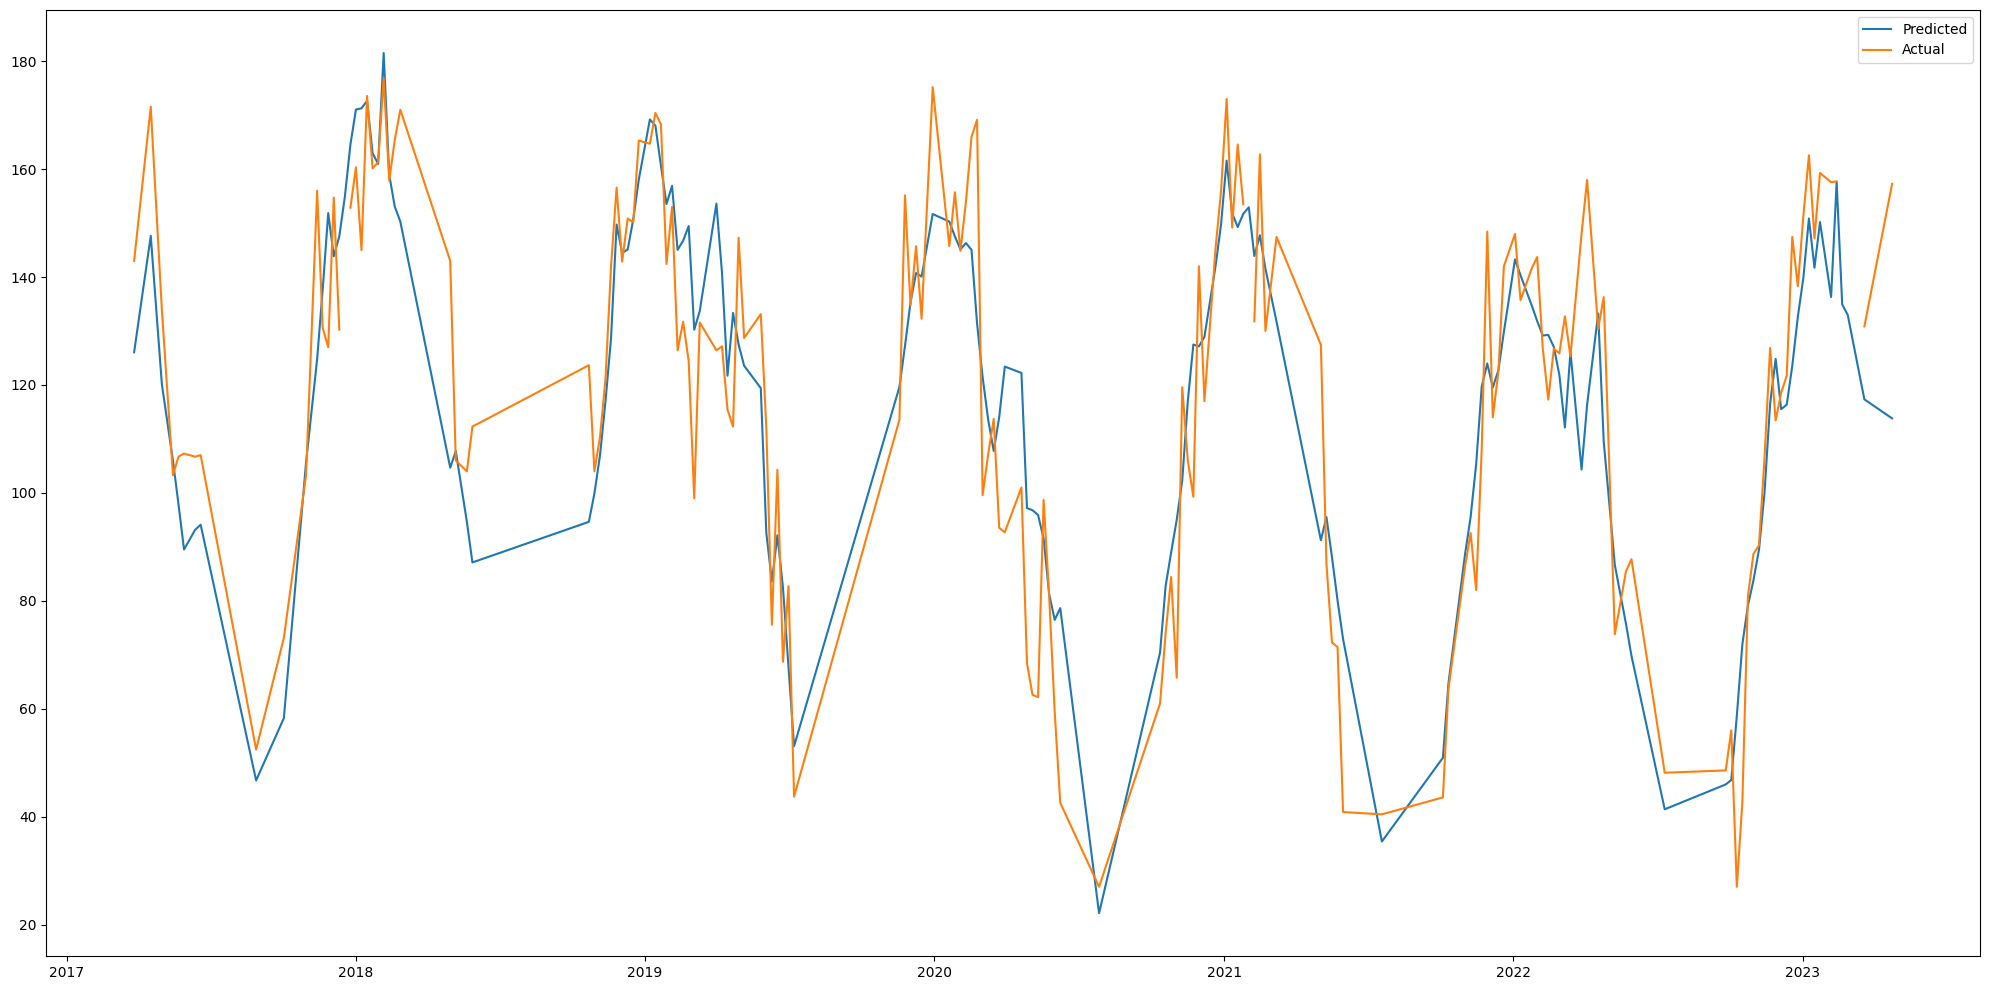

In [35]:
fig, axes = plt.subplots(figsize=(20, 10))
plt.plot(forecast['ds'] ,forecast['yhat'], label='Predicted')
plt.plot(df_merged['date'], df_merged['Particulate_Matter_2.5'], label='Actual')
plt.tight_layout()
plt.legend()  # Add legend to the plot
plt.show()  # Display the plot

In [36]:

final_df = pd.DataFrame(forecast)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(x = df_merged['date'], y=df_merged["Particulate_Matter_2.5"], name= 'Actual')
predict_chart = go.Scatter(x = final_df['ds'], y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(x = final_df['ds'],y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(x = final_df['ds'],y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [37]:
df_filled = df_merged['Particulate_Matter_2.5'].interpolate(method = 'linear')

In [38]:
df_filled

0      143.000000
1      171.571429
2      134.000000
3      103.285714
4      106.714286
          ...    
163    157.750000
164    148.785714
165    139.821429
166    130.857143
167    157.285714
Name: Particulate_Matter_2.5, Length: 168, dtype: float64

In [39]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

accuracy = forecast_accuracy(test['Particulate_Matter_2.5'].values, forecast_new['yhat'].values)

In [40]:
accuracy

{'mape': 0.13272671202941297,
 'me': 5.829260961294976,
 'mae': 12.114735577282422,
 'mpe': 0.046506271321325295,
 'rmse': 15.98195539509277,
 'corr': 0.9348771561080288,
 'minmax': 0.1191889412438657}

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '1000 days', period = '14 days', horizon = ' 365 days')

INFO:prophet:Making 34 forecasts with cutoffs between 2019-12-29 00:00:00 and 2021-04-04 00:00:00


  0%|          | 0/34 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/0blu3n8g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/u1242mc6.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:31:34 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=18816', 'data', 'file=/tmp/tmp6c66i0sk/0blu3n8g.json', 'init=/tmp/tmp6c66i0sk/u1242mc6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelsblc8nx1/prophet_model-20230731163134_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=18816', 'data', 'file=/tmp/tmp6c66i0sk/0blu3n8g.json', 'init=/tmp/tmp6c66i0sk/u1242mc6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelsblc8nx1/prophet_model-20230731163134_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:32:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=18816', 'data', 'file=/tmp/tmp6c66i0sk/0blu3n8g.json', 'init=/tmp/tmp6c66i0sk/u1242mc6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelsblc8nx1/prophet_model-20230731163134_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelsblc8nx1/prophet_model-20230731163134_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelsblc8nx1/prophet_model-20230731163134_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/o928mck_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/kq02n1jq.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:32:06 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=73215', 'data', 'file=/tmp/tmp6c66i0sk/o928mck_.json', 'init=/tmp/tmp6c66i0sk/kq02n1jq.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelh0qhfigq/prophet_model-20230731163206_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=73215', 'data', 'file=/tmp/tmp6c66i0sk/o928mck_.json', 'init=/tmp/tmp6c66i0sk/kq02n1jq.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelh0qhfigq/prophet_model-20230731163206_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:32:36 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=73215', 'data', 'file=/tmp/tmp6c66i0sk/o928mck_.json', 'init=/tmp/tmp6c66i0sk/kq02n1jq.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelh0qhfigq/prophet_model-20230731163206_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelh0qhfigq/prophet_model-20230731163206_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelh0qhfigq/prophet_model-20230731163206_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/rv4hhhgb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/qng9y7wl.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:32:37 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=9070', 'data', 'file=/tmp/tmp6c66i0sk/rv4hhhgb.json', 'init=/tmp/tmp6c66i0sk/qng9y7wl.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model0oi2ikls/prophet_model-20230731163237_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=9070', 'data', 'file=/tmp/tmp6c66i0sk/rv4hhhgb.json', 'init=/tmp/tmp6c66i0sk/qng9y7wl.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model0oi2ikls/prophet_model-20230731163237_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

16:33:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=9070', 'data', 'file=/tmp/tmp6c66i0sk/rv4hhhgb.json', 'init=/tmp/tmp6c66i0sk/qng9y7wl.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model0oi2ikls/prophet_model-20230731163237_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_model0oi2ikls/prophet_model-20230731163237_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_model0oi2ikls/prophet_model-20230731163237_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/_275wouz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/7cr_brb2.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:33:07 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=22333', 'data', 'file=/tmp/tmp6c66i0sk/_275wouz.json', 'init=/tmp/tmp6c66i0sk/7cr_brb2.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelkwl_b51s/prophet_model-20230731163307_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=22333', 'data', 'file=/tmp/tmp6c66i0sk/_275wouz.json', 'init=/tmp/tmp6c66i0sk/7cr_brb2.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelkwl_b51s/prophet_model-20230731163307_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:33:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=22333', 'data', 'file=/tmp/tmp6c66i0sk/_275wouz.json', 'init=/tmp/tmp6c66i0sk/7cr_brb2.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelkwl_b51s/prophet_model-20230731163307_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelkwl_b51s/prophet_model-20230731163307_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelkwl_b51s/prophet_model-20230731163307_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/k6yzddy1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/z1wm8yvl.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:33:36 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=75211', 'data', 'file=/tmp/tmp6c66i0sk/k6yzddy1.json', 'init=/tmp/tmp6c66i0sk/z1wm8yvl.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelopwhpwmu/prophet_model-20230731163336_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=75211', 'data', 'file=/tmp/tmp6c66i0sk/k6yzddy1.json', 'init=/tmp/tmp6c66i0sk/z1wm8yvl.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelopwhpwmu/prophet_model-20230731163336_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:34:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=75211', 'data', 'file=/tmp/tmp6c66i0sk/k6yzddy1.json', 'init=/tmp/tmp6c66i0sk/z1wm8yvl.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelopwhpwmu/prophet_model-20230731163336_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelopwhpwmu/prophet_model-20230731163336_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelopwhpwmu/prophet_model-20230731163336_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/n3wf9ox1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/53er5_nm.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:34:05 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=41896', 'data', 'file=/tmp/tmp6c66i0sk/n3wf9ox1.json', 'init=/tmp/tmp6c66i0sk/53er5_nm.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model1h_8v3gt/prophet_model-20230731163405_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=41896', 'data', 'file=/tmp/tmp6c66i0sk/n3wf9ox1.json', 'init=/tmp/tmp6c66i0sk/53er5_nm.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model1h_8v3gt/prophet_model-20230731163405_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:34:35 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=41896', 'data', 'file=/tmp/tmp6c66i0sk/n3wf9ox1.json', 'init=/tmp/tmp6c66i0sk/53er5_nm.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model1h_8v3gt/prophet_model-20230731163405_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_model1h_8v3gt/prophet_model-20230731163405_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_model1h_8v3gt/prophet_model-20230731163405_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/if8ahq9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/yuedh_q_.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:34:37 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=61451', 'data', 'file=/tmp/tmp6c66i0sk/if8ahq9f.json', 'init=/tmp/tmp6c66i0sk/yuedh_q_.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model99wghh26/prophet_model-20230731163437_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=61451', 'data', 'file=/tmp/tmp6c66i0sk/if8ahq9f.json', 'init=/tmp/tmp6c66i0sk/yuedh_q_.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model99wghh26/prophet_model-20230731163437_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:35:07 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=61451', 'data', 'file=/tmp/tmp6c66i0sk/if8ahq9f.json', 'init=/tmp/tmp6c66i0sk/yuedh_q_.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model99wghh26/prophet_model-20230731163437_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_model99wghh26/prophet_model-20230731163437_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_model99wghh26/prophet_model-20230731163437_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/va6u0rm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/lhgpwkwv.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:35:09 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=25159', 'data', 'file=/tmp/tmp6c66i0sk/va6u0rm_.json', 'init=/tmp/tmp6c66i0sk/lhgpwkwv.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model0xuvycl5/prophet_model-20230731163509_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=25159', 'data', 'file=/tmp/tmp6c66i0sk/va6u0rm_.json', 'init=/tmp/tmp6c66i0sk/lhgpwkwv.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model0xuvycl5/prophet_model-20230731163509_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:35:38 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=25159', 'data', 'file=/tmp/tmp6c66i0sk/va6u0rm_.json', 'init=/tmp/tmp6c66i0sk/lhgpwkwv.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model0xuvycl5/prophet_model-20230731163509_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_model0xuvycl5/prophet_model-20230731163509_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_model0xuvycl5/prophet_model-20230731163509_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/bu7dpztc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/cuk_6fd6.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:35:40 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=4971', 'data', 'file=/tmp/tmp6c66i0sk/bu7dpztc.json', 'init=/tmp/tmp6c66i0sk/cuk_6fd6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelxn36vng4/prophet_model-20230731163540_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=4971', 'data', 'file=/tmp/tmp6c66i0sk/bu7dpztc.json', 'init=/tmp/tmp6c66i0sk/cuk_6fd6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelxn36vng4/prophet_model-20230731163540_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

16:36:10 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=4971', 'data', 'file=/tmp/tmp6c66i0sk/bu7dpztc.json', 'init=/tmp/tmp6c66i0sk/cuk_6fd6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelxn36vng4/prophet_model-20230731163540_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelxn36vng4/prophet_model-20230731163540_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelxn36vng4/prophet_model-20230731163540_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/tfsrc_c8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/trmuudfm.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:36:12 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=61666', 'data', 'file=/tmp/tmp6c66i0sk/tfsrc_c8.json', 'init=/tmp/tmp6c66i0sk/trmuudfm.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelio6oeojq/prophet_model-20230731163612_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=61666', 'data', 'file=/tmp/tmp6c66i0sk/tfsrc_c8.json', 'init=/tmp/tmp6c66i0sk/trmuudfm.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelio6oeojq/prophet_model-20230731163612_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:36:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=61666', 'data', 'file=/tmp/tmp6c66i0sk/tfsrc_c8.json', 'init=/tmp/tmp6c66i0sk/trmuudfm.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelio6oeojq/prophet_model-20230731163612_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelio6oeojq/prophet_model-20230731163612_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelio6oeojq/prophet_model-20230731163612_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/kv297b7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/n9tn34z6.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:36:44 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=99383', 'data', 'file=/tmp/tmp6c66i0sk/kv297b7l.json', 'init=/tmp/tmp6c66i0sk/n9tn34z6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelg8lxshb3/prophet_model-20230731163645_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=99383', 'data', 'file=/tmp/tmp6c66i0sk/kv297b7l.json', 'init=/tmp/tmp6c66i0sk/n9tn34z6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelg8lxshb3/prophet_model-20230731163645_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:37:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=99383', 'data', 'file=/tmp/tmp6c66i0sk/kv297b7l.json', 'init=/tmp/tmp6c66i0sk/n9tn34z6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelg8lxshb3/prophet_model-20230731163645_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelg8lxshb3/prophet_model-20230731163645_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelg8lxshb3/prophet_model-20230731163645_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/4bqdje0j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/7158ct6g.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:37:17 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=40664', 'data', 'file=/tmp/tmp6c66i0sk/4bqdje0j.json', 'init=/tmp/tmp6c66i0sk/7158ct6g.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelajge_nqw/prophet_model-20230731163717_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=40664', 'data', 'file=/tmp/tmp6c66i0sk/4bqdje0j.json', 'init=/tmp/tmp6c66i0sk/7158ct6g.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelajge_nqw/prophet_model-20230731163717_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:37:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=40664', 'data', 'file=/tmp/tmp6c66i0sk/4bqdje0j.json', 'init=/tmp/tmp6c66i0sk/7158ct6g.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelajge_nqw/prophet_model-20230731163717_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelajge_nqw/prophet_model-20230731163717_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelajge_nqw/prophet_model-20230731163717_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/vsi6bwi6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/9urv5z8c.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:37:49 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=36817', 'data', 'file=/tmp/tmp6c66i0sk/vsi6bwi6.json', 'init=/tmp/tmp6c66i0sk/9urv5z8c.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model_6yctkhy/prophet_model-20230731163749_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=36817', 'data', 'file=/tmp/tmp6c66i0sk/vsi6bwi6.json', 'init=/tmp/tmp6c66i0sk/9urv5z8c.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model_6yctkhy/prophet_model-20230731163749_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:38:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=36817', 'data', 'file=/tmp/tmp6c66i0sk/vsi6bwi6.json', 'init=/tmp/tmp6c66i0sk/9urv5z8c.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_model_6yctkhy/prophet_model-20230731163749_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_model_6yctkhy/prophet_model-20230731163749_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_model_6yctkhy/prophet_model-20230731163749_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/ja3cy8cm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/qfy3lpd6.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:38:23 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=71287', 'data', 'file=/tmp/tmp6c66i0sk/ja3cy8cm.json', 'init=/tmp/tmp6c66i0sk/qfy3lpd6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelj6ny2f1r/prophet_model-20230731163823_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=71287', 'data', 'file=/tmp/tmp6c66i0sk/ja3cy8cm.json', 'init=/tmp/tmp6c66i0sk/qfy3lpd6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelj6ny2f1r/prophet_model-20230731163823_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

16:38:54 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=71287', 'data', 'file=/tmp/tmp6c66i0sk/ja3cy8cm.json', 'init=/tmp/tmp6c66i0sk/qfy3lpd6.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelj6ny2f1r/prophet_model-20230731163823_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelj6ny2f1r/prophet_model-20230731163823_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelj6ny2f1r/prophet_model-20230731163823_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/1v8dr2lt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/47nstsm3.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:38:56 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8939', 'data', 'file=/tmp/tmp6c66i0sk/1v8dr2lt.json', 'init=/tmp/tmp6c66i0sk/47nstsm3.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelcd2zgz9d/prophet_model-20230731163856_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=8939', 'data', 'file=/tmp/tmp6c66i0sk/1v8dr2lt.json', 'init=/tmp/tmp6c66i0sk/47nstsm3.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelcd2zgz9d/prophet_model-20230731163856_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

16:39:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8939', 'data', 'file=/tmp/tmp6c66i0sk/1v8dr2lt.json', 'init=/tmp/tmp6c66i0sk/47nstsm3.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelcd2zgz9d/prophet_model-20230731163856_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6c66i0sk/prophet_modelcd2zgz9d/prophet_model-20230731163856_1.csv
 console_msgs (if any):
	/tmp/tmp6c66i0sk/prophet_modelcd2zgz9d/prophet_model-20230731163856_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/pm7ppz4z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6c66i0sk/vnvptkjn.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
16:39:29 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=18260', 'data', 'file=/tmp/tmp6c66i0sk/pm7ppz4z.json', 'init=/tmp/tmp6c66i0sk/vnvptkjn.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelb1oltcsy/prophet_model-20230731163929_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=18260', 'data', 'file=/tmp/tmp6c66i0sk/pm7ppz4z.json', 'init=/tmp/tmp6c66i0sk/vnvptkjn.json', 'output', 'file=/tmp/tmp6c66i0sk/prophet_modelb1oltcsy/prophet_model-20230731163929_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

horizon           mse        rmse        mae      mape     mdape     smape  \
0  7 days    628.153428   25.062989  17.788496  0.173071  0.114039  0.146167   
1 14 days    649.600430   25.487260  19.984789  0.203315  0.167245  0.180681   
2 21 days    913.081297   30.217235  21.164180  0.212846  0.115836  0.195346   
3 28 days  13072.692422  114.335875  42.595828  0.967131  0.171822  0.338154   

   coverage  
0  0.783784  
1  0.710526  
2  0.731707  
3  0.636364

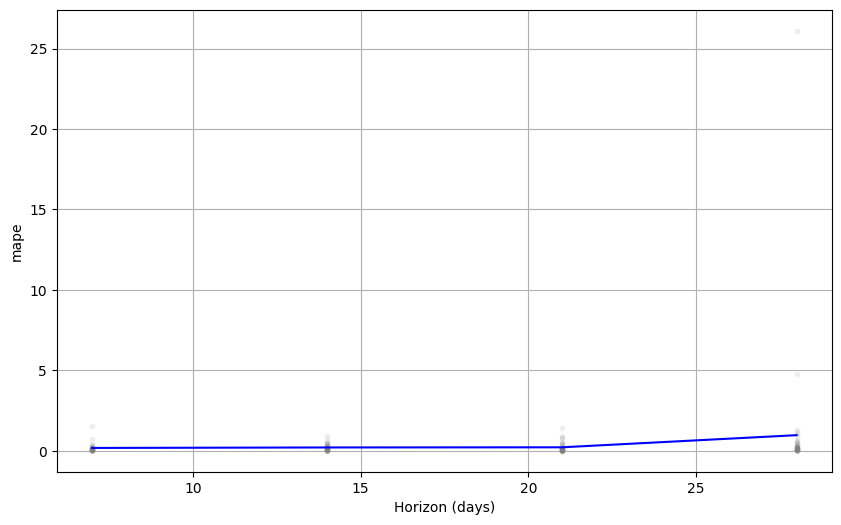

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
from prophet.utilities import regressor_coefficients as rc
coef = rc(model)

coef

regressor  regressor_mode     center  coef_lower      coef  coef_upper
0         h  multiplicative   0.617647   -0.022734 -0.005610    0.012236
1         n  multiplicative  26.029412    0.001824  0.002802    0.003701

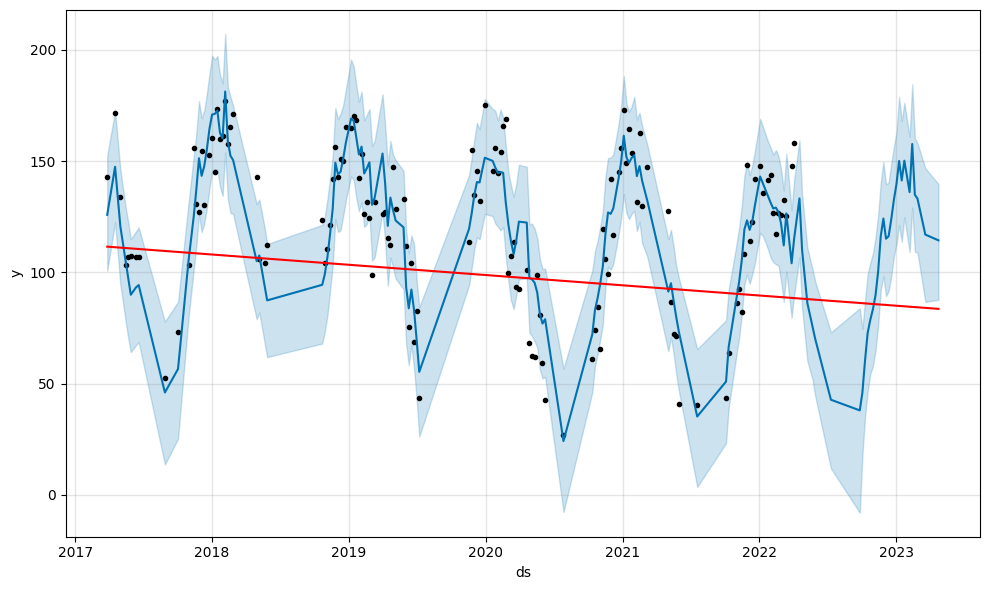

In [ ]:
# Python
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [ ]:
df_cv = cross_validation(model, initial='370 days', period='7 days', horizon='28 days',

                         parallel="processes")


INFO:prophet:Making 129 forecasts with cutoffs between 2018-04-02 00:00:00 and 2022-03-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7b6a314682b0>
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrhm4zo9/dnixth8w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrhm4zo9/6msk04f3.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
14:37:32 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrhm4zo9/a762krkm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrhm4zo9/etjev_mo.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
14:37:32 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdst

chain 1 |          | 00:00 Status

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=161', 'data', 'file=/tmp/tmpnrhm4zo9/dnixth8w.json', 'init=/tmp/tmpnrhm4zo9/6msk04f3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelekbinxqs/prophet_model-20230724143733_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=161', 'data', 'file=/tmp/tmpnrhm4zo9/dnixth8w.json', 'init=/tmp/tmpnrhm4zo9/6msk04f3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelekbinxqs/prophet_model-20230724143733_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algo

14:37:54 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=19513', 'data', 'file=/tmp/tmpnrhm4zo9/a762krkm.json', 'init=/tmp/tmpnrhm4zo9/etjev_mo.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelzh31r3wq/prophet_model-20230724143733_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelzh31r3wq/prophet_model-20230724143733_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelzh31r3wq/prophet_model-20230724143733_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
      term_buffer = 50 (Default)
      window = 25 (Default)
    algorithm = hmc (Default)
      hmc
        engine = nuts (Default)
          nuts
            max_depth = 10 (Default)
        metric = diag_e (Default)
        metric_file =  (Default)
        stepsize = 1 (Default)
        stepsize_jitter = 0 (Default)
    num_chains = 1 (Default)
id = 1 (Default)
data
  file = /tmp/tmpnrhm4zo9/dnixth8w.json
init = /tmp/tmpnrhm4zo9/6msk04f3.json
random
  seed = 161
output
  file = /tmp/tmpnrhm4zo9/prophet_modelekbinxqs/prophet_model-20230724143733_1.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8235', 'data', 'file=/tmp/tmpnrhm4zo9/rujaofad.json', 'init=/tmp/tmpnrhm4zo9/q6k0kpo9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelq7yk7r4h/prophet_model-20230724143756_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=8235', 'data', 'file=/tmp/tmpnrhm4zo9/rujaofad.json', 'init=/tmp/tmpnrhm4zo9/q6k0kpo9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelq7yk7r4h/prophet_model-20230724143756_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
INFO:prophet:n_changepoints greate

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=28865', 'data', 'file=/tmp/tmpnrhm4zo9/z5nnl_ov.json', 'init=/tmp/tmpnrhm4zo9/bdh_vviy.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelqltl1yk1/prophet_model-20230724143757_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=28865', 'data', 'file=/tmp/tmpnrhm4zo9/z5nnl_ov.json', 'init=/tmp/tmpnrhm4zo9/bdh_vviy.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelqltl1yk1/prophet_model-20230724143757_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:38:16 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8235', 'data', 'file=/tmp/tmpnrhm4zo9/rujaofad.json', 'init=/tmp/tmpnrhm4zo9/q6k0kpo9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelq7yk7r4h/prophet_model-20230724143756_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelq7yk7r4h/prophet_model-20230724143756_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelq7yk7r4h/prophet_model-20230724143756_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

14:38:16 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=28865', 'data', 'file=/tmp/tmpnrhm4zo9/z5nnl_ov.json', 'init=/tmp/tmpnrhm4zo9/bdh_vviy.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelqltl1yk1/prophet_model-20230724143757_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelqltl1yk1/prophet_model-20230724143757_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelqltl1yk1/prophet_model-20230724143757_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=60754', 'data', 'file=/tmp/tmpnrhm4zo9/5xwm7967.json', 'init=/tmp/tmpnrhm4zo9/d8dpv4_c.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6msnnh_4/prophet_model-20230724143817_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrhm4zo9/atdomvte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrhm4zo9/h9cvc835.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=60754', 'data', 'file=/tmp/tmpnrhm4zo9/5xwm7967.json', 'init=/tmp/tmpnrhm4zo9/d8dpv4_c.json', 'output', 'file=

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=44550', 'data', 'file=/tmp/tmpnrhm4zo9/atdomvte.json', 'init=/tmp/tmpnrhm4zo9/h9cvc835.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluhtrgx_1/prophet_model-20230724143818_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=44550', 'data', 'file=/tmp/tmpnrhm4zo9/atdomvte.json', 'init=/tmp/tmpnrhm4zo9/h9cvc835.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluhtrgx_1/prophet_model-20230724143818_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:38:39 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=60754', 'data', 'file=/tmp/tmpnrhm4zo9/5xwm7967.json', 'init=/tmp/tmpnrhm4zo9/d8dpv4_c.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6msnnh_4/prophet_model-20230724143817_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model6msnnh_4/prophet_model-20230724143817_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model6msnnh_4/prophet_model-20230724143817_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

14:38:40 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=44550', 'data', 'file=/tmp/tmpnrhm4zo9/atdomvte.json', 'init=/tmp/tmpnrhm4zo9/h9cvc835.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluhtrgx_1/prophet_model-20230724143818_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeluhtrgx_1/prophet_model-20230724143818_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeluhtrgx_1/prophet_model-20230724143818_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=3559', 'data', 'file=/tmp/tmpnrhm4zo9/m6nm7_0a.json', 'init=/tmp/tmpnrhm4zo9/6yxo3ajr.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modela2b8itu5/prophet_model-20230724143840_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=3559', 'data', 'file=/tmp/tmpnrhm4zo9/m6nm7_0a.json', 'init=/tmp/tmpnrhm4zo9/6yxo3ajr.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modela2b8itu5/prophet_model-20230724143840_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
INFO:prophet:n_changepoints greate

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=96828', 'data', 'file=/tmp/tmpnrhm4zo9/dkrmcc2p.json', 'init=/tmp/tmpnrhm4zo9/9qprl021.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelufv58b74/prophet_model-20230724143842_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=96828', 'data', 'file=/tmp/tmpnrhm4zo9/dkrmcc2p.json', 'init=/tmp/tmpnrhm4zo9/9qprl021.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelufv58b74/prophet_model-20230724143842_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:39:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=3559', 'data', 'file=/tmp/tmpnrhm4zo9/m6nm7_0a.json', 'init=/tmp/tmpnrhm4zo9/6yxo3ajr.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modela2b8itu5/prophet_model-20230724143840_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modela2b8itu5/prophet_model-20230724143840_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modela2b8itu5/prophet_model-20230724143840_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

14:39:04 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=96828', 'data', 'file=/tmp/tmpnrhm4zo9/dkrmcc2p.json', 'init=/tmp/tmpnrhm4zo9/9qprl021.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelufv58b74/prophet_model-20230724143842_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelufv58b74/prophet_model-20230724143842_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelufv58b74/prophet_model-20230724143842_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=78432', 'data', 'file=/tmp/tmpnrhm4zo9/7mokwbuu.json', 'init=/tmp/tmpnrhm4zo9/o8a6d9vw.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelzqzt86mf/prophet_model-20230724143905_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=78432', 'data', 'file=/tmp/tmpnrhm4zo9/7mokwbuu.json', 'init=/tmp/tmpnrhm4zo9/o8a6d9vw.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelzqzt86mf/prophet_model-20230724143905_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
INFO:prophet:n_changepoints grea

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=68484', 'data', 'file=/tmp/tmpnrhm4zo9/lsz4pbb6.json', 'init=/tmp/tmpnrhm4zo9/lvyp8x26.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model1d3nfjdh/prophet_model-20230724143907_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=68484', 'data', 'file=/tmp/tmpnrhm4zo9/lsz4pbb6.json', 'init=/tmp/tmpnrhm4zo9/lvyp8x26.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model1d3nfjdh/prophet_model-20230724143907_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:39:25 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=78432', 'data', 'file=/tmp/tmpnrhm4zo9/7mokwbuu.json', 'init=/tmp/tmpnrhm4zo9/o8a6d9vw.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelzqzt86mf/prophet_model-20230724143905_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelzqzt86mf/prophet_model-20230724143905_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelzqzt86mf/prophet_model-20230724143905_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=7483', 'data', 'file=/tmp/tmpnrhm4zo9/jrt_a9yx.json', 'init=/tmp/tmpnrhm4zo9/0flrmr69.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelbrt6hbz5/prophet_model-20230724143927_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7483', 'data', 'file=/tmp/tmpnrhm4zo9/jrt_a9yx.json', 'init=/tmp/tmpnrhm4zo9/0flrmr69.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelbrt6hbz5/prophet_model-20230724143927_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:39:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=68484', 'data', 'file=/tmp/tmpnrhm4zo9/lsz4pbb6.json', 'init=/tmp/tmpnrhm4zo9/lvyp8x26.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model1d3nfjdh/prophet_model-20230724143907_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model1d3nfjdh/prophet_model-20230724143907_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model1d3nfjdh/prophet_model-20230724143907_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=1724', 'data', 'file=/tmp/tmpnrhm4zo9/i94kcjb0.json', 'init=/tmp/tmpnrhm4zo9/a95a7ige.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modellru3xy76/prophet_model-20230724143932_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=1724', 'data', 'file=/tmp/tmpnrhm4zo9/i94kcjb0.json', 'init=/tmp/tmpnrhm4zo9/a95a7ige.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modellru3xy76/prophet_model-20230724143932_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

14:39:50 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7483', 'data', 'file=/tmp/tmpnrhm4zo9/jrt_a9yx.json', 'init=/tmp/tmpnrhm4zo9/0flrmr69.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelbrt6hbz5/prophet_model-20230724143927_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelbrt6hbz5/prophet_model-20230724143927_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelbrt6hbz5/prophet_model-20230724143927_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=17568', 'data', 'file=/tmp/tmpnrhm4zo9/fa143jmq.json', 'init=/tmp/tmpnrhm4zo9/ti0vykvm.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5_ohuhwd/prophet_model-20230724143952_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=17568', 'data', 'file=/tmp/tmpnrhm4zo9/fa143jmq.json', 'init=/tmp/tmpnrhm4zo9/ti0vykvm.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5_ohuhwd/prophet_model-20230724143952_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:39:54 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=1724', 'data', 'file=/tmp/tmpnrhm4zo9/i94kcjb0.json', 'init=/tmp/tmpnrhm4zo9/a95a7ige.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modellru3xy76/prophet_model-20230724143932_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modellru3xy76/prophet_model-20230724143932_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modellru3xy76/prophet_model-20230724143932_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=94449', 'data', 'file=/tmp/tmpnrhm4zo9/8vh_i9ba.json', 'init=/tmp/tmpnrhm4zo9/7_8h76pw.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model7q6wn59o/prophet_model-20230724143958_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=94449', 'data', 'file=/tmp/tmpnrhm4zo9/8vh_i9ba.json', 'init=/tmp/tmpnrhm4zo9/7_8h76pw.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model7q6wn59o/prophet_model-20230724143958_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:40:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=17568', 'data', 'file=/tmp/tmpnrhm4zo9/fa143jmq.json', 'init=/tmp/tmpnrhm4zo9/ti0vykvm.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5_ohuhwd/prophet_model-20230724143952_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model5_ohuhwd/prophet_model-20230724143952_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model5_ohuhwd/prophet_model-20230724143952_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=93357', 'data', 'file=/tmp/tmpnrhm4zo9/xairro6v.json', 'init=/tmp/tmpnrhm4zo9/84t7av4k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model07u101ut/prophet_model-20230724144018_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=93357', 'data', 'file=/tmp/tmpnrhm4zo9/xairro6v.json', 'init=/tmp/tmpnrhm4zo9/84t7av4k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model07u101ut/prophet_model-20230724144018_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:40:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=94449', 'data', 'file=/tmp/tmpnrhm4zo9/8vh_i9ba.json', 'init=/tmp/tmpnrhm4zo9/7_8h76pw.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model7q6wn59o/prophet_model-20230724143958_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model7q6wn59o/prophet_model-20230724143958_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model7q6wn59o/prophet_model-20230724143958_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=25735', 'data', 'file=/tmp/tmpnrhm4zo9/f641rnfk.json', 'init=/tmp/tmpnrhm4zo9/z4k7h8l8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelxzojym22/prophet_model-20230724144024_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=25735', 'data', 'file=/tmp/tmpnrhm4zo9/f641rnfk.json', 'init=/tmp/tmpnrhm4zo9/z4k7h8l8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelxzojym22/prophet_model-20230724144024_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:40:39 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=93357', 'data', 'file=/tmp/tmpnrhm4zo9/xairro6v.json', 'init=/tmp/tmpnrhm4zo9/84t7av4k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model07u101ut/prophet_model-20230724144018_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model07u101ut/prophet_model-20230724144018_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model07u101ut/prophet_model-20230724144018_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=72472', 'data', 'file=/tmp/tmpnrhm4zo9/bznl3zuh.json', 'init=/tmp/tmpnrhm4zo9/ggh5wzz3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelfjvujo7h/prophet_model-20230724144043_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=72472', 'data', 'file=/tmp/tmpnrhm4zo9/bznl3zuh.json', 'init=/tmp/tmpnrhm4zo9/ggh5wzz3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelfjvujo7h/prophet_model-20230724144043_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:40:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=25735', 'data', 'file=/tmp/tmpnrhm4zo9/f641rnfk.json', 'init=/tmp/tmpnrhm4zo9/z4k7h8l8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelxzojym22/prophet_model-20230724144024_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelxzojym22/prophet_model-20230724144024_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelxzojym22/prophet_model-20230724144024_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=60354', 'data', 'file=/tmp/tmpnrhm4zo9/6snpk0be.json', 'init=/tmp/tmpnrhm4zo9/uayl86mx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelaggb8im7/prophet_model-20230724144050_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=60354', 'data', 'file=/tmp/tmpnrhm4zo9/6snpk0be.json', 'init=/tmp/tmpnrhm4zo9/uayl86mx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelaggb8im7/prophet_model-20230724144050_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:41:06 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=72472', 'data', 'file=/tmp/tmpnrhm4zo9/bznl3zuh.json', 'init=/tmp/tmpnrhm4zo9/ggh5wzz3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelfjvujo7h/prophet_model-20230724144043_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelfjvujo7h/prophet_model-20230724144043_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelfjvujo7h/prophet_model-20230724144043_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=89134', 'data', 'file=/tmp/tmpnrhm4zo9/3qpky_8n.json', 'init=/tmp/tmpnrhm4zo9/daf61pyd.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5lazcsoc/prophet_model-20230724144108_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=89134', 'data', 'file=/tmp/tmpnrhm4zo9/3qpky_8n.json', 'init=/tmp/tmpnrhm4zo9/daf61pyd.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5lazcsoc/prophet_model-20230724144108_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:41:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=60354', 'data', 'file=/tmp/tmpnrhm4zo9/6snpk0be.json', 'init=/tmp/tmpnrhm4zo9/uayl86mx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelaggb8im7/prophet_model-20230724144050_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelaggb8im7/prophet_model-20230724144050_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelaggb8im7/prophet_model-20230724144050_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=60304', 'data', 'file=/tmp/tmpnrhm4zo9/239iqhlo.json', 'init=/tmp/tmpnrhm4zo9/8eawqwkx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelgfxq2r0a/prophet_model-20230724144118_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=60304', 'data', 'file=/tmp/tmpnrhm4zo9/239iqhlo.json', 'init=/tmp/tmpnrhm4zo9/8eawqwkx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelgfxq2r0a/prophet_model-20230724144118_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:41:33 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=89134', 'data', 'file=/tmp/tmpnrhm4zo9/3qpky_8n.json', 'init=/tmp/tmpnrhm4zo9/daf61pyd.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5lazcsoc/prophet_model-20230724144108_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model5lazcsoc/prophet_model-20230724144108_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model5lazcsoc/prophet_model-20230724144108_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=95339', 'data', 'file=/tmp/tmpnrhm4zo9/m1ol5h6j.json', 'init=/tmp/tmpnrhm4zo9/iffr4fnn.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8_ztpuem/prophet_model-20230724144136_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=95339', 'data', 'file=/tmp/tmpnrhm4zo9/m1ol5h6j.json', 'init=/tmp/tmpnrhm4zo9/iffr4fnn.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8_ztpuem/prophet_model-20230724144136_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:41:42 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=60304', 'data', 'file=/tmp/tmpnrhm4zo9/239iqhlo.json', 'init=/tmp/tmpnrhm4zo9/8eawqwkx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelgfxq2r0a/prophet_model-20230724144118_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelgfxq2r0a/prophet_model-20230724144118_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelgfxq2r0a/prophet_model-20230724144118_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=174', 'data', 'file=/tmp/tmpnrhm4zo9/5sy284tp.json', 'init=/tmp/tmpnrhm4zo9/zgk10xym.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model0l56i96e/prophet_model-20230724144145_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=174', 'data', 'file=/tmp/tmpnrhm4zo9/5sy284tp.json', 'init=/tmp/tmpnrhm4zo9/zgk10xym.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model0l56i96e/prophet_model-20230724144145_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

14:42:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=95339', 'data', 'file=/tmp/tmpnrhm4zo9/m1ol5h6j.json', 'init=/tmp/tmpnrhm4zo9/iffr4fnn.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8_ztpuem/prophet_model-20230724144136_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model8_ztpuem/prophet_model-20230724144136_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model8_ztpuem/prophet_model-20230724144136_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=95842', 'data', 'file=/tmp/tmpnrhm4zo9/04m46sm8.json', 'init=/tmp/tmpnrhm4zo9/ll_vyx3a.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeljlbzwtu9/prophet_model-20230724144203_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=95842', 'data', 'file=/tmp/tmpnrhm4zo9/04m46sm8.json', 'init=/tmp/tmpnrhm4zo9/ll_vyx3a.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeljlbzwtu9/prophet_model-20230724144203_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:42:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=174', 'data', 'file=/tmp/tmpnrhm4zo9/5sy284tp.json', 'init=/tmp/tmpnrhm4zo9/zgk10xym.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model0l56i96e/prophet_model-20230724144145_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model0l56i96e/prophet_model-20230724144145_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model0l56i96e/prophet_model-20230724144145_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Default

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7891', 'data', 'file=/tmp/tmpnrhm4zo9/dk5usd0e.json', 'init=/tmp/tmpnrhm4zo9/vdvs2q9k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelgysg13ga/prophet_model-20230724144212_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=7891', 'data', 'file=/tmp/tmpnrhm4zo9/dk5usd0e.json', 'init=/tmp/tmpnrhm4zo9/vdvs2q9k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelgysg13ga/prophet_model-20230724144212_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

14:42:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=95842', 'data', 'file=/tmp/tmpnrhm4zo9/04m46sm8.json', 'init=/tmp/tmpnrhm4zo9/ll_vyx3a.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeljlbzwtu9/prophet_model-20230724144203_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeljlbzwtu9/prophet_model-20230724144203_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeljlbzwtu9/prophet_model-20230724144203_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=61266', 'data', 'file=/tmp/tmpnrhm4zo9/9zkl4f18.json', 'init=/tmp/tmpnrhm4zo9/29lvw1mc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelfz1j44ql/prophet_model-20230724144230_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=61266', 'data', 'file=/tmp/tmpnrhm4zo9/9zkl4f18.json', 'init=/tmp/tmpnrhm4zo9/29lvw1mc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelfz1j44ql/prophet_model-20230724144230_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:42:37 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7891', 'data', 'file=/tmp/tmpnrhm4zo9/dk5usd0e.json', 'init=/tmp/tmpnrhm4zo9/vdvs2q9k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelgysg13ga/prophet_model-20230724144212_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelgysg13ga/prophet_model-20230724144212_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelgysg13ga/prophet_model-20230724144212_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=25961', 'data', 'file=/tmp/tmpnrhm4zo9/517orcvc.json', 'init=/tmp/tmpnrhm4zo9/omuqi4t4.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeleqhvo2xh/prophet_model-20230724144239_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=25961', 'data', 'file=/tmp/tmpnrhm4zo9/517orcvc.json', 'init=/tmp/tmpnrhm4zo9/omuqi4t4.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeleqhvo2xh/prophet_model-20230724144239_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:42:56 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=61266', 'data', 'file=/tmp/tmpnrhm4zo9/9zkl4f18.json', 'init=/tmp/tmpnrhm4zo9/29lvw1mc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelfz1j44ql/prophet_model-20230724144230_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelfz1j44ql/prophet_model-20230724144230_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelfz1j44ql/prophet_model-20230724144230_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8075', 'data', 'file=/tmp/tmpnrhm4zo9/5pepueq8.json', 'init=/tmp/tmpnrhm4zo9/4xp6cxbi.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model1k7pc9fc/prophet_model-20230724144259_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=8075', 'data', 'file=/tmp/tmpnrhm4zo9/5pepueq8.json', 'init=/tmp/tmpnrhm4zo9/4xp6cxbi.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model1k7pc9fc/prophet_model-20230724144259_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:43:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=25961', 'data', 'file=/tmp/tmpnrhm4zo9/517orcvc.json', 'init=/tmp/tmpnrhm4zo9/omuqi4t4.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeleqhvo2xh/prophet_model-20230724144239_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeleqhvo2xh/prophet_model-20230724144239_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeleqhvo2xh/prophet_model-20230724144239_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=70843', 'data', 'file=/tmp/tmpnrhm4zo9/ej5rz14a.json', 'init=/tmp/tmpnrhm4zo9/689yb28c.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelskwj7996/prophet_model-20230724144308_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=70843', 'data', 'file=/tmp/tmpnrhm4zo9/ej5rz14a.json', 'init=/tmp/tmpnrhm4zo9/689yb28c.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelskwj7996/prophet_model-20230724144308_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:43:25 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8075', 'data', 'file=/tmp/tmpnrhm4zo9/5pepueq8.json', 'init=/tmp/tmpnrhm4zo9/4xp6cxbi.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model1k7pc9fc/prophet_model-20230724144259_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model1k7pc9fc/prophet_model-20230724144259_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model1k7pc9fc/prophet_model-20230724144259_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=65417', 'data', 'file=/tmp/tmpnrhm4zo9/m2wv3w6y.json', 'init=/tmp/tmpnrhm4zo9/pn2smtz1.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model16_dm9sl/prophet_model-20230724144328_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=65417', 'data', 'file=/tmp/tmpnrhm4zo9/m2wv3w6y.json', 'init=/tmp/tmpnrhm4zo9/pn2smtz1.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model16_dm9sl/prophet_model-20230724144328_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:43:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=70843', 'data', 'file=/tmp/tmpnrhm4zo9/ej5rz14a.json', 'init=/tmp/tmpnrhm4zo9/689yb28c.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelskwj7996/prophet_model-20230724144308_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelskwj7996/prophet_model-20230724144308_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelskwj7996/prophet_model-20230724144308_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=22702', 'data', 'file=/tmp/tmpnrhm4zo9/hgyxaiwj.json', 'init=/tmp/tmpnrhm4zo9/mag65ikc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelcj33k89t/prophet_model-20230724144336_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=22702', 'data', 'file=/tmp/tmpnrhm4zo9/hgyxaiwj.json', 'init=/tmp/tmpnrhm4zo9/mag65ikc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelcj33k89t/prophet_model-20230724144336_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:43:54 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=65417', 'data', 'file=/tmp/tmpnrhm4zo9/m2wv3w6y.json', 'init=/tmp/tmpnrhm4zo9/pn2smtz1.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model16_dm9sl/prophet_model-20230724144328_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model16_dm9sl/prophet_model-20230724144328_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model16_dm9sl/prophet_model-20230724144328_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=14084', 'data', 'file=/tmp/tmpnrhm4zo9/z9fomboy.json', 'init=/tmp/tmpnrhm4zo9/h0bzcypb.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model065fuayk/prophet_model-20230724144357_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=14084', 'data', 'file=/tmp/tmpnrhm4zo9/z9fomboy.json', 'init=/tmp/tmpnrhm4zo9/h0bzcypb.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model065fuayk/prophet_model-20230724144357_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:44:04 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=22702', 'data', 'file=/tmp/tmpnrhm4zo9/hgyxaiwj.json', 'init=/tmp/tmpnrhm4zo9/mag65ikc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelcj33k89t/prophet_model-20230724144336_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelcj33k89t/prophet_model-20230724144336_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelcj33k89t/prophet_model-20230724144336_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=5260', 'data', 'file=/tmp/tmpnrhm4zo9/b06lfklp.json', 'init=/tmp/tmpnrhm4zo9/hlysv5lj.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelu0_ag62v/prophet_model-20230724144406_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=5260', 'data', 'file=/tmp/tmpnrhm4zo9/b06lfklp.json', 'init=/tmp/tmpnrhm4zo9/hlysv5lj.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelu0_ag62v/prophet_model-20230724144406_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

14:44:24 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=14084', 'data', 'file=/tmp/tmpnrhm4zo9/z9fomboy.json', 'init=/tmp/tmpnrhm4zo9/h0bzcypb.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model065fuayk/prophet_model-20230724144357_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model065fuayk/prophet_model-20230724144357_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model065fuayk/prophet_model-20230724144357_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=2953', 'data', 'file=/tmp/tmpnrhm4zo9/ztnqzvmh.json', 'init=/tmp/tmpnrhm4zo9/_y4m8vas.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3m3lrzuc/prophet_model-20230724144427_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=2953', 'data', 'file=/tmp/tmpnrhm4zo9/ztnqzvmh.json', 'init=/tmp/tmpnrhm4zo9/_y4m8vas.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3m3lrzuc/prophet_model-20230724144427_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:44:33 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=5260', 'data', 'file=/tmp/tmpnrhm4zo9/b06lfklp.json', 'init=/tmp/tmpnrhm4zo9/hlysv5lj.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelu0_ag62v/prophet_model-20230724144406_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelu0_ag62v/prophet_model-20230724144406_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelu0_ag62v/prophet_model-20230724144406_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=51290', 'data', 'file=/tmp/tmpnrhm4zo9/tkkiaps6.json', 'init=/tmp/tmpnrhm4zo9/p_t3o7ks.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3tif2o0o/prophet_model-20230724144436_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=51290', 'data', 'file=/tmp/tmpnrhm4zo9/tkkiaps6.json', 'init=/tmp/tmpnrhm4zo9/p_t3o7ks.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3tif2o0o/prophet_model-20230724144436_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:44:54 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=2953', 'data', 'file=/tmp/tmpnrhm4zo9/ztnqzvmh.json', 'init=/tmp/tmpnrhm4zo9/_y4m8vas.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3m3lrzuc/prophet_model-20230724144427_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model3m3lrzuc/prophet_model-20230724144427_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model3m3lrzuc/prophet_model-20230724144427_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=10020', 'data', 'file=/tmp/tmpnrhm4zo9/c5288vwk.json', 'init=/tmp/tmpnrhm4zo9/nvcohh6f.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsydduyl4/prophet_model-20230724144458_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=10020', 'data', 'file=/tmp/tmpnrhm4zo9/c5288vwk.json', 'init=/tmp/tmpnrhm4zo9/nvcohh6f.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsydduyl4/prophet_model-20230724144458_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:45:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=51290', 'data', 'file=/tmp/tmpnrhm4zo9/tkkiaps6.json', 'init=/tmp/tmpnrhm4zo9/p_t3o7ks.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3tif2o0o/prophet_model-20230724144436_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model3tif2o0o/prophet_model-20230724144436_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model3tif2o0o/prophet_model-20230724144436_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=79411', 'data', 'file=/tmp/tmpnrhm4zo9/4up_zf6u.json', 'init=/tmp/tmpnrhm4zo9/9bd4z75h.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5zd1z0jj/prophet_model-20230724144506_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=79411', 'data', 'file=/tmp/tmpnrhm4zo9/4up_zf6u.json', 'init=/tmp/tmpnrhm4zo9/9bd4z75h.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5zd1z0jj/prophet_model-20230724144506_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:45:26 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=10020', 'data', 'file=/tmp/tmpnrhm4zo9/c5288vwk.json', 'init=/tmp/tmpnrhm4zo9/nvcohh6f.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsydduyl4/prophet_model-20230724144458_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelsydduyl4/prophet_model-20230724144458_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelsydduyl4/prophet_model-20230724144458_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=31041', 'data', 'file=/tmp/tmpnrhm4zo9/h2r63_fa.json', 'init=/tmp/tmpnrhm4zo9/amktcqlh.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelq7n_dqjk/prophet_model-20230724144529_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=31041', 'data', 'file=/tmp/tmpnrhm4zo9/h2r63_fa.json', 'init=/tmp/tmpnrhm4zo9/amktcqlh.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelq7n_dqjk/prophet_model-20230724144529_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:45:33 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=79411', 'data', 'file=/tmp/tmpnrhm4zo9/4up_zf6u.json', 'init=/tmp/tmpnrhm4zo9/9bd4z75h.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5zd1z0jj/prophet_model-20230724144506_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model5zd1z0jj/prophet_model-20230724144506_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model5zd1z0jj/prophet_model-20230724144506_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=51880', 'data', 'file=/tmp/tmpnrhm4zo9/d5fnxfme.json', 'init=/tmp/tmpnrhm4zo9/wcadpwzs.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelxphw8grh/prophet_model-20230724144536_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=51880', 'data', 'file=/tmp/tmpnrhm4zo9/d5fnxfme.json', 'init=/tmp/tmpnrhm4zo9/wcadpwzs.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelxphw8grh/prophet_model-20230724144536_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:45:57 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=31041', 'data', 'file=/tmp/tmpnrhm4zo9/h2r63_fa.json', 'init=/tmp/tmpnrhm4zo9/amktcqlh.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelq7n_dqjk/prophet_model-20230724144529_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelq7n_dqjk/prophet_model-20230724144529_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelq7n_dqjk/prophet_model-20230724144529_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=33528', 'data', 'file=/tmp/tmpnrhm4zo9/pwf940kj.json', 'init=/tmp/tmpnrhm4zo9/ksje_po6.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelxdvuwuts/prophet_model-20230724144600_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=33528', 'data', 'file=/tmp/tmpnrhm4zo9/pwf940kj.json', 'init=/tmp/tmpnrhm4zo9/ksje_po6.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelxdvuwuts/prophet_model-20230724144600_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:46:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=51880', 'data', 'file=/tmp/tmpnrhm4zo9/d5fnxfme.json', 'init=/tmp/tmpnrhm4zo9/wcadpwzs.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelxphw8grh/prophet_model-20230724144536_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelxphw8grh/prophet_model-20230724144536_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelxphw8grh/prophet_model-20230724144536_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=46751', 'data', 'file=/tmp/tmpnrhm4zo9/_js2knfi.json', 'init=/tmp/tmpnrhm4zo9/9r9eah0a.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelykprjsql/prophet_model-20230724144609_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=46751', 'data', 'file=/tmp/tmpnrhm4zo9/_js2knfi.json', 'init=/tmp/tmpnrhm4zo9/9r9eah0a.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelykprjsql/prophet_model-20230724144609_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:46:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=33528', 'data', 'file=/tmp/tmpnrhm4zo9/pwf940kj.json', 'init=/tmp/tmpnrhm4zo9/ksje_po6.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelxdvuwuts/prophet_model-20230724144600_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelxdvuwuts/prophet_model-20230724144600_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelxdvuwuts/prophet_model-20230724144600_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=71831', 'data', 'file=/tmp/tmpnrhm4zo9/tgy03juc.json', 'init=/tmp/tmpnrhm4zo9/9ijdiup7.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model0tthomdh/prophet_model-20230724144631_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=71831', 'data', 'file=/tmp/tmpnrhm4zo9/tgy03juc.json', 'init=/tmp/tmpnrhm4zo9/9ijdiup7.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model0tthomdh/prophet_model-20230724144631_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:46:36 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=46751', 'data', 'file=/tmp/tmpnrhm4zo9/_js2knfi.json', 'init=/tmp/tmpnrhm4zo9/9r9eah0a.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelykprjsql/prophet_model-20230724144609_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelykprjsql/prophet_model-20230724144609_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelykprjsql/prophet_model-20230724144609_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=6202', 'data', 'file=/tmp/tmpnrhm4zo9/5ds5k9pi.json', 'init=/tmp/tmpnrhm4zo9/_k9wzzzz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelb3qagrf4/prophet_model-20230724144639_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=6202', 'data', 'file=/tmp/tmpnrhm4zo9/5ds5k9pi.json', 'init=/tmp/tmpnrhm4zo9/_k9wzzzz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelb3qagrf4/prophet_model-20230724144639_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

14:47:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=71831', 'data', 'file=/tmp/tmpnrhm4zo9/tgy03juc.json', 'init=/tmp/tmpnrhm4zo9/9ijdiup7.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model0tthomdh/prophet_model-20230724144631_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model0tthomdh/prophet_model-20230724144631_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model0tthomdh/prophet_model-20230724144631_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=58271', 'data', 'file=/tmp/tmpnrhm4zo9/9pby15r5.json', 'init=/tmp/tmpnrhm4zo9/u7fymaji.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnmh_57if/prophet_model-20230724144705_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=58271', 'data', 'file=/tmp/tmpnrhm4zo9/9pby15r5.json', 'init=/tmp/tmpnrhm4zo9/u7fymaji.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnmh_57if/prophet_model-20230724144705_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:47:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=6202', 'data', 'file=/tmp/tmpnrhm4zo9/5ds5k9pi.json', 'init=/tmp/tmpnrhm4zo9/_k9wzzzz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelb3qagrf4/prophet_model-20230724144639_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelb3qagrf4/prophet_model-20230724144639_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelb3qagrf4/prophet_model-20230724144639_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=5537', 'data', 'file=/tmp/tmpnrhm4zo9/8hviez6_.json', 'init=/tmp/tmpnrhm4zo9/m1ghczzu.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeljumpyfx2/prophet_model-20230724144712_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=5537', 'data', 'file=/tmp/tmpnrhm4zo9/8hviez6_.json', 'init=/tmp/tmpnrhm4zo9/m1ghczzu.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeljumpyfx2/prophet_model-20230724144712_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

14:47:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=58271', 'data', 'file=/tmp/tmpnrhm4zo9/9pby15r5.json', 'init=/tmp/tmpnrhm4zo9/u7fymaji.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnmh_57if/prophet_model-20230724144705_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelnmh_57if/prophet_model-20230724144705_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelnmh_57if/prophet_model-20230724144705_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=7097', 'data', 'file=/tmp/tmpnrhm4zo9/by1m2t1s.json', 'init=/tmp/tmpnrhm4zo9/y64zgxkf.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluf36yvry/prophet_model-20230724144738_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7097', 'data', 'file=/tmp/tmpnrhm4zo9/by1m2t1s.json', 'init=/tmp/tmpnrhm4zo9/y64zgxkf.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluf36yvry/prophet_model-20230724144738_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:47:42 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=5537', 'data', 'file=/tmp/tmpnrhm4zo9/8hviez6_.json', 'init=/tmp/tmpnrhm4zo9/m1ghczzu.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeljumpyfx2/prophet_model-20230724144712_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeljumpyfx2/prophet_model-20230724144712_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeljumpyfx2/prophet_model-20230724144712_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=17273', 'data', 'file=/tmp/tmpnrhm4zo9/w7cv58oh.json', 'init=/tmp/tmpnrhm4zo9/v6feu_d_.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelicxv4_vv/prophet_model-20230724144744_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=17273', 'data', 'file=/tmp/tmpnrhm4zo9/w7cv58oh.json', 'init=/tmp/tmpnrhm4zo9/v6feu_d_.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelicxv4_vv/prophet_model-20230724144744_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:48:08 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7097', 'data', 'file=/tmp/tmpnrhm4zo9/by1m2t1s.json', 'init=/tmp/tmpnrhm4zo9/y64zgxkf.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluf36yvry/prophet_model-20230724144738_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeluf36yvry/prophet_model-20230724144738_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeluf36yvry/prophet_model-20230724144738_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=67655', 'data', 'file=/tmp/tmpnrhm4zo9/36vt6spc.json', 'init=/tmp/tmpnrhm4zo9/xeikhk6q.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelffgx6ns7/prophet_model-20230724144810_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=67655', 'data', 'file=/tmp/tmpnrhm4zo9/36vt6spc.json', 'init=/tmp/tmpnrhm4zo9/xeikhk6q.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelffgx6ns7/prophet_model-20230724144810_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:48:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=17273', 'data', 'file=/tmp/tmpnrhm4zo9/w7cv58oh.json', 'init=/tmp/tmpnrhm4zo9/v6feu_d_.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelicxv4_vv/prophet_model-20230724144744_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelicxv4_vv/prophet_model-20230724144744_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelicxv4_vv/prophet_model-20230724144744_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=9832', 'data', 'file=/tmp/tmpnrhm4zo9/ppmevdur.json', 'init=/tmp/tmpnrhm4zo9/dg6lqw_y.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeljvj7d7sw/prophet_model-20230724144818_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=9832', 'data', 'file=/tmp/tmpnrhm4zo9/ppmevdur.json', 'init=/tmp/tmpnrhm4zo9/dg6lqw_y.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeljvj7d7sw/prophet_model-20230724144818_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

14:48:39 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=67655', 'data', 'file=/tmp/tmpnrhm4zo9/36vt6spc.json', 'init=/tmp/tmpnrhm4zo9/xeikhk6q.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelffgx6ns7/prophet_model-20230724144810_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelffgx6ns7/prophet_model-20230724144810_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelffgx6ns7/prophet_model-20230724144810_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=94805', 'data', 'file=/tmp/tmpnrhm4zo9/qan8ggdl.json', 'init=/tmp/tmpnrhm4zo9/cxt4ej1u.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeltxiv_kud/prophet_model-20230724144842_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=94805', 'data', 'file=/tmp/tmpnrhm4zo9/qan8ggdl.json', 'init=/tmp/tmpnrhm4zo9/cxt4ej1u.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeltxiv_kud/prophet_model-20230724144842_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:48:48 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=9832', 'data', 'file=/tmp/tmpnrhm4zo9/ppmevdur.json', 'init=/tmp/tmpnrhm4zo9/dg6lqw_y.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeljvj7d7sw/prophet_model-20230724144818_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeljvj7d7sw/prophet_model-20230724144818_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeljvj7d7sw/prophet_model-20230724144818_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=96360', 'data', 'file=/tmp/tmpnrhm4zo9/35s5hz3j.json', 'init=/tmp/tmpnrhm4zo9/h1osb4jr.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelpsghk6kg/prophet_model-20230724144851_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=96360', 'data', 'file=/tmp/tmpnrhm4zo9/35s5hz3j.json', 'init=/tmp/tmpnrhm4zo9/h1osb4jr.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelpsghk6kg/prophet_model-20230724144851_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:49:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=94805', 'data', 'file=/tmp/tmpnrhm4zo9/qan8ggdl.json', 'init=/tmp/tmpnrhm4zo9/cxt4ej1u.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeltxiv_kud/prophet_model-20230724144842_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeltxiv_kud/prophet_model-20230724144842_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeltxiv_kud/prophet_model-20230724144842_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=14466', 'data', 'file=/tmp/tmpnrhm4zo9/d5_03yco.json', 'init=/tmp/tmpnrhm4zo9/6e2ai4up.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsx3ts3yk/prophet_model-20230724144917_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=14466', 'data', 'file=/tmp/tmpnrhm4zo9/d5_03yco.json', 'init=/tmp/tmpnrhm4zo9/6e2ai4up.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsx3ts3yk/prophet_model-20230724144917_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:49:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=96360', 'data', 'file=/tmp/tmpnrhm4zo9/35s5hz3j.json', 'init=/tmp/tmpnrhm4zo9/h1osb4jr.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelpsghk6kg/prophet_model-20230724144851_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelpsghk6kg/prophet_model-20230724144851_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelpsghk6kg/prophet_model-20230724144851_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=22461', 'data', 'file=/tmp/tmpnrhm4zo9/j_ms913v.json', 'init=/tmp/tmpnrhm4zo9/wimnmfy4.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8uozb8pn/prophet_model-20230724144923_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=22461', 'data', 'file=/tmp/tmpnrhm4zo9/j_ms913v.json', 'init=/tmp/tmpnrhm4zo9/wimnmfy4.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8uozb8pn/prophet_model-20230724144923_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:49:48 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=14466', 'data', 'file=/tmp/tmpnrhm4zo9/d5_03yco.json', 'init=/tmp/tmpnrhm4zo9/6e2ai4up.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsx3ts3yk/prophet_model-20230724144917_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelsx3ts3yk/prophet_model-20230724144917_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelsx3ts3yk/prophet_model-20230724144917_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=32809', 'data', 'file=/tmp/tmpnrhm4zo9/lu77kymf.json', 'init=/tmp/tmpnrhm4zo9/xfhsfhay.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5xj6a5dr/prophet_model-20230724144950_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=32809', 'data', 'file=/tmp/tmpnrhm4zo9/lu77kymf.json', 'init=/tmp/tmpnrhm4zo9/xfhsfhay.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5xj6a5dr/prophet_model-20230724144950_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:49:55 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=22461', 'data', 'file=/tmp/tmpnrhm4zo9/j_ms913v.json', 'init=/tmp/tmpnrhm4zo9/wimnmfy4.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8uozb8pn/prophet_model-20230724144923_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model8uozb8pn/prophet_model-20230724144923_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model8uozb8pn/prophet_model-20230724144923_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=52258', 'data', 'file=/tmp/tmpnrhm4zo9/__js2pr3.json', 'init=/tmp/tmpnrhm4zo9/1dmle2__.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3d3zt_qo/prophet_model-20230724144958_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=52258', 'data', 'file=/tmp/tmpnrhm4zo9/__js2pr3.json', 'init=/tmp/tmpnrhm4zo9/1dmle2__.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3d3zt_qo/prophet_model-20230724144958_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:50:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=32809', 'data', 'file=/tmp/tmpnrhm4zo9/lu77kymf.json', 'init=/tmp/tmpnrhm4zo9/xfhsfhay.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5xj6a5dr/prophet_model-20230724144950_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model5xj6a5dr/prophet_model-20230724144950_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model5xj6a5dr/prophet_model-20230724144950_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=26349', 'data', 'file=/tmp/tmpnrhm4zo9/orl5fifd.json', 'init=/tmp/tmpnrhm4zo9/u79u915c.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrjit7d3g/prophet_model-20230724145026_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=26349', 'data', 'file=/tmp/tmpnrhm4zo9/orl5fifd.json', 'init=/tmp/tmpnrhm4zo9/u79u915c.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrjit7d3g/prophet_model-20230724145026_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:50:29 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=52258', 'data', 'file=/tmp/tmpnrhm4zo9/__js2pr3.json', 'init=/tmp/tmpnrhm4zo9/1dmle2__.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3d3zt_qo/prophet_model-20230724144958_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model3d3zt_qo/prophet_model-20230724144958_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model3d3zt_qo/prophet_model-20230724144958_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=78354', 'data', 'file=/tmp/tmpnrhm4zo9/ncyj9nxo.json', 'init=/tmp/tmpnrhm4zo9/tijlcws9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluzejqjyb/prophet_model-20230724145032_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=78354', 'data', 'file=/tmp/tmpnrhm4zo9/ncyj9nxo.json', 'init=/tmp/tmpnrhm4zo9/tijlcws9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluzejqjyb/prophet_model-20230724145032_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:50:58 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=26349', 'data', 'file=/tmp/tmpnrhm4zo9/orl5fifd.json', 'init=/tmp/tmpnrhm4zo9/u79u915c.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrjit7d3g/prophet_model-20230724145026_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelrjit7d3g/prophet_model-20230724145026_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelrjit7d3g/prophet_model-20230724145026_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=179', 'data', 'file=/tmp/tmpnrhm4zo9/hmnfyzc8.json', 'init=/tmp/tmpnrhm4zo9/a7f_9azq.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsgdewwrw/prophet_model-20230724145101_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=179', 'data', 'file=/tmp/tmpnrhm4zo9/hmnfyzc8.json', 'init=/tmp/tmpnrhm4zo9/a7f_9azq.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsgdewwrw/prophet_model-20230724145101_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:51:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=78354', 'data', 'file=/tmp/tmpnrhm4zo9/ncyj9nxo.json', 'init=/tmp/tmpnrhm4zo9/tijlcws9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluzejqjyb/prophet_model-20230724145032_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeluzejqjyb/prophet_model-20230724145032_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeluzejqjyb/prophet_model-20230724145032_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=13066', 'data', 'file=/tmp/tmpnrhm4zo9/jybg66oa.json', 'init=/tmp/tmpnrhm4zo9/9plrw8qj.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelcc_vjoxz/prophet_model-20230724145105_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=13066', 'data', 'file=/tmp/tmpnrhm4zo9/jybg66oa.json', 'init=/tmp/tmpnrhm4zo9/9plrw8qj.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelcc_vjoxz/prophet_model-20230724145105_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:51:32 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=179', 'data', 'file=/tmp/tmpnrhm4zo9/hmnfyzc8.json', 'init=/tmp/tmpnrhm4zo9/a7f_9azq.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsgdewwrw/prophet_model-20230724145101_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelsgdewwrw/prophet_model-20230724145101_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelsgdewwrw/prophet_model-20230724145101_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Default

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=39108', 'data', 'file=/tmp/tmpnrhm4zo9/mf64jsaf.json', 'init=/tmp/tmpnrhm4zo9/clj6j7u0.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeli_iqyg03/prophet_model-20230724145136_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=39108', 'data', 'file=/tmp/tmpnrhm4zo9/mf64jsaf.json', 'init=/tmp/tmpnrhm4zo9/clj6j7u0.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeli_iqyg03/prophet_model-20230724145136_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:51:39 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=13066', 'data', 'file=/tmp/tmpnrhm4zo9/jybg66oa.json', 'init=/tmp/tmpnrhm4zo9/9plrw8qj.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelcc_vjoxz/prophet_model-20230724145105_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelcc_vjoxz/prophet_model-20230724145105_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelcc_vjoxz/prophet_model-20230724145105_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8386', 'data', 'file=/tmp/tmpnrhm4zo9/fjyh9l3r.json', 'init=/tmp/tmpnrhm4zo9/tvwppyub.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8z13idq4/prophet_model-20230724145141_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=8386', 'data', 'file=/tmp/tmpnrhm4zo9/fjyh9l3r.json', 'init=/tmp/tmpnrhm4zo9/tvwppyub.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8z13idq4/prophet_model-20230724145141_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

14:52:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=39108', 'data', 'file=/tmp/tmpnrhm4zo9/mf64jsaf.json', 'init=/tmp/tmpnrhm4zo9/clj6j7u0.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeli_iqyg03/prophet_model-20230724145136_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeli_iqyg03/prophet_model-20230724145136_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeli_iqyg03/prophet_model-20230724145136_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=56722', 'data', 'file=/tmp/tmpnrhm4zo9/io2_mkdf.json', 'init=/tmp/tmpnrhm4zo9/0t96hx7d.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3fot8u9_/prophet_model-20230724145212_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=56722', 'data', 'file=/tmp/tmpnrhm4zo9/io2_mkdf.json', 'init=/tmp/tmpnrhm4zo9/0t96hx7d.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3fot8u9_/prophet_model-20230724145212_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:52:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8386', 'data', 'file=/tmp/tmpnrhm4zo9/fjyh9l3r.json', 'init=/tmp/tmpnrhm4zo9/tvwppyub.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8z13idq4/prophet_model-20230724145141_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model8z13idq4/prophet_model-20230724145141_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model8z13idq4/prophet_model-20230724145141_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=85403', 'data', 'file=/tmp/tmpnrhm4zo9/0_r0azh3.json', 'init=/tmp/tmpnrhm4zo9/9sqttx3u.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrhq19rj9/prophet_model-20230724145217_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=85403', 'data', 'file=/tmp/tmpnrhm4zo9/0_r0azh3.json', 'init=/tmp/tmpnrhm4zo9/9sqttx3u.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrhq19rj9/prophet_model-20230724145217_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:52:45 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=56722', 'data', 'file=/tmp/tmpnrhm4zo9/io2_mkdf.json', 'init=/tmp/tmpnrhm4zo9/0t96hx7d.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3fot8u9_/prophet_model-20230724145212_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model3fot8u9_/prophet_model-20230724145212_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model3fot8u9_/prophet_model-20230724145212_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=66955', 'data', 'file=/tmp/tmpnrhm4zo9/hct9d5m0.json', 'init=/tmp/tmpnrhm4zo9/h9v7t5nz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelavmilug3/prophet_model-20230724145248_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=66955', 'data', 'file=/tmp/tmpnrhm4zo9/hct9d5m0.json', 'init=/tmp/tmpnrhm4zo9/h9v7t5nz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelavmilug3/prophet_model-20230724145248_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:52:54 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=85403', 'data', 'file=/tmp/tmpnrhm4zo9/0_r0azh3.json', 'init=/tmp/tmpnrhm4zo9/9sqttx3u.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrhq19rj9/prophet_model-20230724145217_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelrhq19rj9/prophet_model-20230724145217_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelrhq19rj9/prophet_model-20230724145217_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=60186', 'data', 'file=/tmp/tmpnrhm4zo9/fzfg201l.json', 'init=/tmp/tmpnrhm4zo9/17_00fdv.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluk0ze59l/prophet_model-20230724145257_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=60186', 'data', 'file=/tmp/tmpnrhm4zo9/fzfg201l.json', 'init=/tmp/tmpnrhm4zo9/17_00fdv.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluk0ze59l/prophet_model-20230724145257_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:53:23 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=66955', 'data', 'file=/tmp/tmpnrhm4zo9/hct9d5m0.json', 'init=/tmp/tmpnrhm4zo9/h9v7t5nz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelavmilug3/prophet_model-20230724145248_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelavmilug3/prophet_model-20230724145248_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelavmilug3/prophet_model-20230724145248_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=84092', 'data', 'file=/tmp/tmpnrhm4zo9/g26b914w.json', 'init=/tmp/tmpnrhm4zo9/07_qjfal.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrv3nwkh7/prophet_model-20230724145326_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=84092', 'data', 'file=/tmp/tmpnrhm4zo9/g26b914w.json', 'init=/tmp/tmpnrhm4zo9/07_qjfal.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrv3nwkh7/prophet_model-20230724145326_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:53:30 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=60186', 'data', 'file=/tmp/tmpnrhm4zo9/fzfg201l.json', 'init=/tmp/tmpnrhm4zo9/17_00fdv.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluk0ze59l/prophet_model-20230724145257_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeluk0ze59l/prophet_model-20230724145257_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeluk0ze59l/prophet_model-20230724145257_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=80421', 'data', 'file=/tmp/tmpnrhm4zo9/5vj0qf59.json', 'init=/tmp/tmpnrhm4zo9/nwnruas9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelld3n8n1p/prophet_model-20230724145334_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=80421', 'data', 'file=/tmp/tmpnrhm4zo9/5vj0qf59.json', 'init=/tmp/tmpnrhm4zo9/nwnruas9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelld3n8n1p/prophet_model-20230724145334_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:53:59 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=84092', 'data', 'file=/tmp/tmpnrhm4zo9/g26b914w.json', 'init=/tmp/tmpnrhm4zo9/07_qjfal.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrv3nwkh7/prophet_model-20230724145326_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelrv3nwkh7/prophet_model-20230724145326_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelrv3nwkh7/prophet_model-20230724145326_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=55964', 'data', 'file=/tmp/tmpnrhm4zo9/t0ujn6vr.json', 'init=/tmp/tmpnrhm4zo9/2gs6u73z.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelg9p7dz23/prophet_model-20230724145403_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=55964', 'data', 'file=/tmp/tmpnrhm4zo9/t0ujn6vr.json', 'init=/tmp/tmpnrhm4zo9/2gs6u73z.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelg9p7dz23/prophet_model-20230724145403_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:54:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=80421', 'data', 'file=/tmp/tmpnrhm4zo9/5vj0qf59.json', 'init=/tmp/tmpnrhm4zo9/nwnruas9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelld3n8n1p/prophet_model-20230724145334_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelld3n8n1p/prophet_model-20230724145334_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelld3n8n1p/prophet_model-20230724145334_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=11138', 'data', 'file=/tmp/tmpnrhm4zo9/4u04jb4g.json', 'init=/tmp/tmpnrhm4zo9/rwlt3agg.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnwqcehy8/prophet_model-20230724145412_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=11138', 'data', 'file=/tmp/tmpnrhm4zo9/4u04jb4g.json', 'init=/tmp/tmpnrhm4zo9/rwlt3agg.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnwqcehy8/prophet_model-20230724145412_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:54:36 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=55964', 'data', 'file=/tmp/tmpnrhm4zo9/t0ujn6vr.json', 'init=/tmp/tmpnrhm4zo9/2gs6u73z.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelg9p7dz23/prophet_model-20230724145403_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelg9p7dz23/prophet_model-20230724145403_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelg9p7dz23/prophet_model-20230724145403_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=49274', 'data', 'file=/tmp/tmpnrhm4zo9/esvvel89.json', 'init=/tmp/tmpnrhm4zo9/w8w_uxm3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3wivsk98/prophet_model-20230724145438_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=49274', 'data', 'file=/tmp/tmpnrhm4zo9/esvvel89.json', 'init=/tmp/tmpnrhm4zo9/w8w_uxm3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3wivsk98/prophet_model-20230724145438_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:54:48 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=11138', 'data', 'file=/tmp/tmpnrhm4zo9/4u04jb4g.json', 'init=/tmp/tmpnrhm4zo9/rwlt3agg.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnwqcehy8/prophet_model-20230724145412_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelnwqcehy8/prophet_model-20230724145412_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelnwqcehy8/prophet_model-20230724145412_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=20169', 'data', 'file=/tmp/tmpnrhm4zo9/huojiyq5.json', 'init=/tmp/tmpnrhm4zo9/nxzcl7oh.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model_ff2ob10/prophet_model-20230724145451_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=20169', 'data', 'file=/tmp/tmpnrhm4zo9/huojiyq5.json', 'init=/tmp/tmpnrhm4zo9/nxzcl7oh.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model_ff2ob10/prophet_model-20230724145451_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:55:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=49274', 'data', 'file=/tmp/tmpnrhm4zo9/esvvel89.json', 'init=/tmp/tmpnrhm4zo9/w8w_uxm3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3wivsk98/prophet_model-20230724145438_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model3wivsk98/prophet_model-20230724145438_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model3wivsk98/prophet_model-20230724145438_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=92228', 'data', 'file=/tmp/tmpnrhm4zo9/e2dmycft.json', 'init=/tmp/tmpnrhm4zo9/mv5_0t83.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model_ofo8v_z/prophet_model-20230724145516_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=92228', 'data', 'file=/tmp/tmpnrhm4zo9/e2dmycft.json', 'init=/tmp/tmpnrhm4zo9/mv5_0t83.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model_ofo8v_z/prophet_model-20230724145516_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:55:25 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=20169', 'data', 'file=/tmp/tmpnrhm4zo9/huojiyq5.json', 'init=/tmp/tmpnrhm4zo9/nxzcl7oh.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model_ff2ob10/prophet_model-20230724145451_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model_ff2ob10/prophet_model-20230724145451_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model_ff2ob10/prophet_model-20230724145451_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=86626', 'data', 'file=/tmp/tmpnrhm4zo9/kqy1zmoj.json', 'init=/tmp/tmpnrhm4zo9/hb8akxht.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeldc2gjyvs/prophet_model-20230724145529_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=86626', 'data', 'file=/tmp/tmpnrhm4zo9/kqy1zmoj.json', 'init=/tmp/tmpnrhm4zo9/hb8akxht.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeldc2gjyvs/prophet_model-20230724145529_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:55:51 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=92228', 'data', 'file=/tmp/tmpnrhm4zo9/e2dmycft.json', 'init=/tmp/tmpnrhm4zo9/mv5_0t83.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model_ofo8v_z/prophet_model-20230724145516_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model_ofo8v_z/prophet_model-20230724145516_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model_ofo8v_z/prophet_model-20230724145516_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=47388', 'data', 'file=/tmp/tmpnrhm4zo9/3auo1_6o.json', 'init=/tmp/tmpnrhm4zo9/7wbh5e95.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelhqd95k43/prophet_model-20230724145553_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=47388', 'data', 'file=/tmp/tmpnrhm4zo9/3auo1_6o.json', 'init=/tmp/tmpnrhm4zo9/7wbh5e95.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelhqd95k43/prophet_model-20230724145553_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:56:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=86626', 'data', 'file=/tmp/tmpnrhm4zo9/kqy1zmoj.json', 'init=/tmp/tmpnrhm4zo9/hb8akxht.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeldc2gjyvs/prophet_model-20230724145529_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeldc2gjyvs/prophet_model-20230724145529_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeldc2gjyvs/prophet_model-20230724145529_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=67500', 'data', 'file=/tmp/tmpnrhm4zo9/ds92t0ky.json', 'init=/tmp/tmpnrhm4zo9/g014ahpg.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelwgx69eh_/prophet_model-20230724145608_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=67500', 'data', 'file=/tmp/tmpnrhm4zo9/ds92t0ky.json', 'init=/tmp/tmpnrhm4zo9/g014ahpg.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelwgx69eh_/prophet_model-20230724145608_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:56:30 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=47388', 'data', 'file=/tmp/tmpnrhm4zo9/3auo1_6o.json', 'init=/tmp/tmpnrhm4zo9/7wbh5e95.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelhqd95k43/prophet_model-20230724145553_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelhqd95k43/prophet_model-20230724145553_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelhqd95k43/prophet_model-20230724145553_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=90231', 'data', 'file=/tmp/tmpnrhm4zo9/8ujyop55.json', 'init=/tmp/tmpnrhm4zo9/cp2jgr0u.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelj0l9jvhv/prophet_model-20230724145633_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=90231', 'data', 'file=/tmp/tmpnrhm4zo9/8ujyop55.json', 'init=/tmp/tmpnrhm4zo9/cp2jgr0u.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelj0l9jvhv/prophet_model-20230724145633_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:56:45 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=67500', 'data', 'file=/tmp/tmpnrhm4zo9/ds92t0ky.json', 'init=/tmp/tmpnrhm4zo9/g014ahpg.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelwgx69eh_/prophet_model-20230724145608_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelwgx69eh_/prophet_model-20230724145608_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelwgx69eh_/prophet_model-20230724145608_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=97320', 'data', 'file=/tmp/tmpnrhm4zo9/m4v2uonq.json', 'init=/tmp/tmpnrhm4zo9/qbpyumpz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelqr9qqiib/prophet_model-20230724145648_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=97320', 'data', 'file=/tmp/tmpnrhm4zo9/m4v2uonq.json', 'init=/tmp/tmpnrhm4zo9/qbpyumpz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelqr9qqiib/prophet_model-20230724145648_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:57:04 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=90231', 'data', 'file=/tmp/tmpnrhm4zo9/8ujyop55.json', 'init=/tmp/tmpnrhm4zo9/cp2jgr0u.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelj0l9jvhv/prophet_model-20230724145633_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelj0l9jvhv/prophet_model-20230724145633_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelj0l9jvhv/prophet_model-20230724145633_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=41689', 'data', 'file=/tmp/tmpnrhm4zo9/_2bwhvk5.json', 'init=/tmp/tmpnrhm4zo9/8rls724d.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modele1uiv7yq/prophet_model-20230724145708_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=41689', 'data', 'file=/tmp/tmpnrhm4zo9/_2bwhvk5.json', 'init=/tmp/tmpnrhm4zo9/8rls724d.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modele1uiv7yq/prophet_model-20230724145708_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:57:23 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=97320', 'data', 'file=/tmp/tmpnrhm4zo9/m4v2uonq.json', 'init=/tmp/tmpnrhm4zo9/qbpyumpz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelqr9qqiib/prophet_model-20230724145648_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelqr9qqiib/prophet_model-20230724145648_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelqr9qqiib/prophet_model-20230724145648_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=15656', 'data', 'file=/tmp/tmpnrhm4zo9/lu6kjvry.json', 'init=/tmp/tmpnrhm4zo9/fq4yve0s.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelbokmx_0n/prophet_model-20230724145727_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=15656', 'data', 'file=/tmp/tmpnrhm4zo9/lu6kjvry.json', 'init=/tmp/tmpnrhm4zo9/fq4yve0s.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelbokmx_0n/prophet_model-20230724145727_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:57:42 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=41689', 'data', 'file=/tmp/tmpnrhm4zo9/_2bwhvk5.json', 'init=/tmp/tmpnrhm4zo9/8rls724d.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modele1uiv7yq/prophet_model-20230724145708_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modele1uiv7yq/prophet_model-20230724145708_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modele1uiv7yq/prophet_model-20230724145708_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=29073', 'data', 'file=/tmp/tmpnrhm4zo9/7f7_sirx.json', 'init=/tmp/tmpnrhm4zo9/f14gyv4k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsclvxhqm/prophet_model-20230724145744_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=29073', 'data', 'file=/tmp/tmpnrhm4zo9/7f7_sirx.json', 'init=/tmp/tmpnrhm4zo9/f14gyv4k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsclvxhqm/prophet_model-20230724145744_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:58:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=15656', 'data', 'file=/tmp/tmpnrhm4zo9/lu6kjvry.json', 'init=/tmp/tmpnrhm4zo9/fq4yve0s.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelbokmx_0n/prophet_model-20230724145727_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelbokmx_0n/prophet_model-20230724145727_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelbokmx_0n/prophet_model-20230724145727_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=35254', 'data', 'file=/tmp/tmpnrhm4zo9/0jw6lxwu.json', 'init=/tmp/tmpnrhm4zo9/w88oti00.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelez508uy8/prophet_model-20230724145805_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=35254', 'data', 'file=/tmp/tmpnrhm4zo9/0jw6lxwu.json', 'init=/tmp/tmpnrhm4zo9/w88oti00.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelez508uy8/prophet_model-20230724145805_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:58:17 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=29073', 'data', 'file=/tmp/tmpnrhm4zo9/7f7_sirx.json', 'init=/tmp/tmpnrhm4zo9/f14gyv4k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelsclvxhqm/prophet_model-20230724145744_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelsclvxhqm/prophet_model-20230724145744_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelsclvxhqm/prophet_model-20230724145744_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=3', 'random', 'seed=35254', 'data', 'file=/tmp/tmpnrhm4zo9/0jw6lxwu.json', 'init=/tmp/tmpnrhm4zo9/w88oti00.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelez508uy8/prophet_model-20230724145805_3.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=26597', 'data', 'file=/tmp/tmpnrhm4zo9/aht8euoo.json', 'init=/tmp/tmpnrhm4zo9/p9ql2vye.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelecejk5en/prophet_model-20230724145821_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=26597', 'data', 'file=/tmp/tmpnrhm4zo9/aht8euoo.json', 'init=/tmp/tmpnrhm4zo9/p9ql2vye.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelecejk5en/prophet_model-20230724145821_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmds

14:58:40 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=35254', 'data', 'file=/tmp/tmpnrhm4zo9/0jw6lxwu.json', 'init=/tmp/tmpnrhm4zo9/w88oti00.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelez508uy8/prophet_model-20230724145805_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelez508uy8/prophet_model-20230724145805_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelez508uy8/prophet_model-20230724145805_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=48097', 'data', 'file=/tmp/tmpnrhm4zo9/b4sim7sw.json', 'init=/tmp/tmpnrhm4zo9/p_2l25r6.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelmvb1keck/prophet_model-20230724145845_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=48097', 'data', 'file=/tmp/tmpnrhm4zo9/b4sim7sw.json', 'init=/tmp/tmpnrhm4zo9/p_2l25r6.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelmvb1keck/prophet_model-20230724145845_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:58:57 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=26597', 'data', 'file=/tmp/tmpnrhm4zo9/aht8euoo.json', 'init=/tmp/tmpnrhm4zo9/p9ql2vye.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelecejk5en/prophet_model-20230724145821_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelecejk5en/prophet_model-20230724145821_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelecejk5en/prophet_model-20230724145821_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=42210', 'data', 'file=/tmp/tmpnrhm4zo9/2jhb8kkn.json', 'init=/tmp/tmpnrhm4zo9/hgcgdvzp.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelw5kfo380/prophet_model-20230724145859_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=42210', 'data', 'file=/tmp/tmpnrhm4zo9/2jhb8kkn.json', 'init=/tmp/tmpnrhm4zo9/hgcgdvzp.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelw5kfo380/prophet_model-20230724145859_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:59:19 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=48097', 'data', 'file=/tmp/tmpnrhm4zo9/b4sim7sw.json', 'init=/tmp/tmpnrhm4zo9/p_2l25r6.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelmvb1keck/prophet_model-20230724145845_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelmvb1keck/prophet_model-20230724145845_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelmvb1keck/prophet_model-20230724145845_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=69717', 'data', 'file=/tmp/tmpnrhm4zo9/drfs8yae.json', 'init=/tmp/tmpnrhm4zo9/z7hm1qbu.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model0ju85tpj/prophet_model-20230724145922_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=69717', 'data', 'file=/tmp/tmpnrhm4zo9/drfs8yae.json', 'init=/tmp/tmpnrhm4zo9/z7hm1qbu.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model0ju85tpj/prophet_model-20230724145922_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


14:59:33 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=42210', 'data', 'file=/tmp/tmpnrhm4zo9/2jhb8kkn.json', 'init=/tmp/tmpnrhm4zo9/hgcgdvzp.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelw5kfo380/prophet_model-20230724145859_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelw5kfo380/prophet_model-20230724145859_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelw5kfo380/prophet_model-20230724145859_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=31079', 'data', 'file=/tmp/tmpnrhm4zo9/3yzjs2c7.json', 'init=/tmp/tmpnrhm4zo9/vloefj4o.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelaiodts3e/prophet_model-20230724145936_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=31079', 'data', 'file=/tmp/tmpnrhm4zo9/3yzjs2c7.json', 'init=/tmp/tmpnrhm4zo9/vloefj4o.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelaiodts3e/prophet_model-20230724145936_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:59:56 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=69717', 'data', 'file=/tmp/tmpnrhm4zo9/drfs8yae.json', 'init=/tmp/tmpnrhm4zo9/z7hm1qbu.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model0ju85tpj/prophet_model-20230724145922_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model0ju85tpj/prophet_model-20230724145922_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model0ju85tpj/prophet_model-20230724145922_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=82150', 'data', 'file=/tmp/tmpnrhm4zo9/tyf9x059.json', 'init=/tmp/tmpnrhm4zo9/5noxyu8k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelpalyy_gq/prophet_model-20230724145959_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=82150', 'data', 'file=/tmp/tmpnrhm4zo9/tyf9x059.json', 'init=/tmp/tmpnrhm4zo9/5noxyu8k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelpalyy_gq/prophet_model-20230724145959_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:00:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=31079', 'data', 'file=/tmp/tmpnrhm4zo9/3yzjs2c7.json', 'init=/tmp/tmpnrhm4zo9/vloefj4o.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelaiodts3e/prophet_model-20230724145936_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelaiodts3e/prophet_model-20230724145936_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelaiodts3e/prophet_model-20230724145936_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=35970', 'data', 'file=/tmp/tmpnrhm4zo9/mojwrftr.json', 'init=/tmp/tmpnrhm4zo9/5r91oyje.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3f2u6ms2/prophet_model-20230724150013_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=35970', 'data', 'file=/tmp/tmpnrhm4zo9/mojwrftr.json', 'init=/tmp/tmpnrhm4zo9/5r91oyje.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3f2u6ms2/prophet_model-20230724150013_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:00:31 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=82150', 'data', 'file=/tmp/tmpnrhm4zo9/tyf9x059.json', 'init=/tmp/tmpnrhm4zo9/5noxyu8k.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelpalyy_gq/prophet_model-20230724145959_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelpalyy_gq/prophet_model-20230724145959_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelpalyy_gq/prophet_model-20230724145959_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=98118', 'data', 'file=/tmp/tmpnrhm4zo9/bqanfvj6.json', 'init=/tmp/tmpnrhm4zo9/9912feov.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8e0j47nh/prophet_model-20230724150034_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=98118', 'data', 'file=/tmp/tmpnrhm4zo9/bqanfvj6.json', 'init=/tmp/tmpnrhm4zo9/9912feov.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8e0j47nh/prophet_model-20230724150034_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:00:45 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=35970', 'data', 'file=/tmp/tmpnrhm4zo9/mojwrftr.json', 'init=/tmp/tmpnrhm4zo9/5r91oyje.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3f2u6ms2/prophet_model-20230724150013_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model3f2u6ms2/prophet_model-20230724150013_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model3f2u6ms2/prophet_model-20230724150013_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8667', 'data', 'file=/tmp/tmpnrhm4zo9/5mcym57k.json', 'init=/tmp/tmpnrhm4zo9/80m2daj3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnqc6ib_6/prophet_model-20230724150048_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=8667', 'data', 'file=/tmp/tmpnrhm4zo9/5mcym57k.json', 'init=/tmp/tmpnrhm4zo9/80m2daj3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnqc6ib_6/prophet_model-20230724150048_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

15:01:08 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=98118', 'data', 'file=/tmp/tmpnrhm4zo9/bqanfvj6.json', 'init=/tmp/tmpnrhm4zo9/9912feov.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8e0j47nh/prophet_model-20230724150034_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model8e0j47nh/prophet_model-20230724150034_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model8e0j47nh/prophet_model-20230724150034_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=34900', 'data', 'file=/tmp/tmpnrhm4zo9/_v0u9eso.json', 'init=/tmp/tmpnrhm4zo9/kywufka8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_models3zqe3fy/prophet_model-20230724150111_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=34900', 'data', 'file=/tmp/tmpnrhm4zo9/_v0u9eso.json', 'init=/tmp/tmpnrhm4zo9/kywufka8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_models3zqe3fy/prophet_model-20230724150111_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:01:25 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8667', 'data', 'file=/tmp/tmpnrhm4zo9/5mcym57k.json', 'init=/tmp/tmpnrhm4zo9/80m2daj3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnqc6ib_6/prophet_model-20230724150048_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelnqc6ib_6/prophet_model-20230724150048_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelnqc6ib_6/prophet_model-20230724150048_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=77341', 'data', 'file=/tmp/tmpnrhm4zo9/25n8beie.json', 'init=/tmp/tmpnrhm4zo9/hp_0lyxc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8j5we5ms/prophet_model-20230724150128_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=77341', 'data', 'file=/tmp/tmpnrhm4zo9/25n8beie.json', 'init=/tmp/tmpnrhm4zo9/hp_0lyxc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8j5we5ms/prophet_model-20230724150128_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:01:45 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=34900', 'data', 'file=/tmp/tmpnrhm4zo9/_v0u9eso.json', 'init=/tmp/tmpnrhm4zo9/kywufka8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_models3zqe3fy/prophet_model-20230724150111_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_models3zqe3fy/prophet_model-20230724150111_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_models3zqe3fy/prophet_model-20230724150111_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=25600', 'data', 'file=/tmp/tmpnrhm4zo9/ni52ci9x.json', 'init=/tmp/tmpnrhm4zo9/9ej3cyqm.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelgw58r0yk/prophet_model-20230724150148_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=25600', 'data', 'file=/tmp/tmpnrhm4zo9/ni52ci9x.json', 'init=/tmp/tmpnrhm4zo9/9ej3cyqm.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelgw58r0yk/prophet_model-20230724150148_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:02:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=77341', 'data', 'file=/tmp/tmpnrhm4zo9/25n8beie.json', 'init=/tmp/tmpnrhm4zo9/hp_0lyxc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model8j5we5ms/prophet_model-20230724150128_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model8j5we5ms/prophet_model-20230724150128_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model8j5we5ms/prophet_model-20230724150128_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=26612', 'data', 'file=/tmp/tmpnrhm4zo9/00koc953.json', 'init=/tmp/tmpnrhm4zo9/blozef4y.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelhptpqped/prophet_model-20230724150206_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=26612', 'data', 'file=/tmp/tmpnrhm4zo9/00koc953.json', 'init=/tmp/tmpnrhm4zo9/blozef4y.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelhptpqped/prophet_model-20230724150206_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmds

15:02:24 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=25600', 'data', 'file=/tmp/tmpnrhm4zo9/ni52ci9x.json', 'init=/tmp/tmpnrhm4zo9/9ej3cyqm.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelgw58r0yk/prophet_model-20230724150148_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelgw58r0yk/prophet_model-20230724150148_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelgw58r0yk/prophet_model-20230724150148_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=50732', 'data', 'file=/tmp/tmpnrhm4zo9/1oopbjla.json', 'init=/tmp/tmpnrhm4zo9/sgcyyrao.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_models8172hp2/prophet_model-20230724150228_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=50732', 'data', 'file=/tmp/tmpnrhm4zo9/1oopbjla.json', 'init=/tmp/tmpnrhm4zo9/sgcyyrao.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_models8172hp2/prophet_model-20230724150228_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:02:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=26612', 'data', 'file=/tmp/tmpnrhm4zo9/00koc953.json', 'init=/tmp/tmpnrhm4zo9/blozef4y.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelhptpqped/prophet_model-20230724150206_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelhptpqped/prophet_model-20230724150206_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelhptpqped/prophet_model-20230724150206_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=4', 'random', 'seed=50732', 'data', 'file=/tmp/tmpnrhm4zo9/1oopbjla.json', 'init=/tmp/tmpnrhm4zo9/sgcyyrao.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_models8172hp2/prophet_model-20230724150228_4.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=44915', 'data', 'file=/tmp/tmpnrhm4zo9/d1zxtp4c.json', 'init=/tmp/tmpnrhm4zo9/_or2l7hr.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelcq3n8bi5/prophet_model-20230724150245_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=44915', 'data', 'file=/tmp/tmpnrhm4zo9/d1zxtp4c.json', 'init=/tmp/tmpnrhm4zo9/_or2l7hr.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelcq3n8bi5/prophet_model-20230724150245_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:03:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=50732', 'data', 'file=/tmp/tmpnrhm4zo9/1oopbjla.json', 'init=/tmp/tmpnrhm4zo9/sgcyyrao.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_models8172hp2/prophet_model-20230724150228_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_models8172hp2/prophet_model-20230724150228_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_models8172hp2/prophet_model-20230724150228_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=48315', 'data', 'file=/tmp/tmpnrhm4zo9/snw6lf9g.json', 'init=/tmp/tmpnrhm4zo9/bfot9is7.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelx2sskwsr/prophet_model-20230724150306_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=48315', 'data', 'file=/tmp/tmpnrhm4zo9/snw6lf9g.json', 'init=/tmp/tmpnrhm4zo9/bfot9is7.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelx2sskwsr/prophet_model-20230724150306_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:03:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=44915', 'data', 'file=/tmp/tmpnrhm4zo9/d1zxtp4c.json', 'init=/tmp/tmpnrhm4zo9/_or2l7hr.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelcq3n8bi5/prophet_model-20230724150245_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelcq3n8bi5/prophet_model-20230724150245_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelcq3n8bi5/prophet_model-20230724150245_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=94941', 'data', 'file=/tmp/tmpnrhm4zo9/4typaj7b.json', 'init=/tmp/tmpnrhm4zo9/4bdwq6fy.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model84roshlg/prophet_model-20230724150325_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=94941', 'data', 'file=/tmp/tmpnrhm4zo9/4typaj7b.json', 'init=/tmp/tmpnrhm4zo9/4bdwq6fy.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model84roshlg/prophet_model-20230724150325_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:03:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=48315', 'data', 'file=/tmp/tmpnrhm4zo9/snw6lf9g.json', 'init=/tmp/tmpnrhm4zo9/bfot9is7.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelx2sskwsr/prophet_model-20230724150306_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelx2sskwsr/prophet_model-20230724150306_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelx2sskwsr/prophet_model-20230724150306_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=29433', 'data', 'file=/tmp/tmpnrhm4zo9/cg2i8c9p.json', 'init=/tmp/tmpnrhm4zo9/9onw8plf.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelwhq87m_z/prophet_model-20230724150347_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=29433', 'data', 'file=/tmp/tmpnrhm4zo9/cg2i8c9p.json', 'init=/tmp/tmpnrhm4zo9/9onw8plf.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelwhq87m_z/prophet_model-20230724150347_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:04:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=94941', 'data', 'file=/tmp/tmpnrhm4zo9/4typaj7b.json', 'init=/tmp/tmpnrhm4zo9/4bdwq6fy.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model84roshlg/prophet_model-20230724150325_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model84roshlg/prophet_model-20230724150325_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model84roshlg/prophet_model-20230724150325_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=47751', 'data', 'file=/tmp/tmpnrhm4zo9/nw9a9fhm.json', 'init=/tmp/tmpnrhm4zo9/vcg5ndm1.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrdsdupfz/prophet_model-20230724150406_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=47751', 'data', 'file=/tmp/tmpnrhm4zo9/nw9a9fhm.json', 'init=/tmp/tmpnrhm4zo9/vcg5ndm1.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrdsdupfz/prophet_model-20230724150406_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:04:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=29433', 'data', 'file=/tmp/tmpnrhm4zo9/cg2i8c9p.json', 'init=/tmp/tmpnrhm4zo9/9onw8plf.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelwhq87m_z/prophet_model-20230724150347_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelwhq87m_z/prophet_model-20230724150347_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelwhq87m_z/prophet_model-20230724150347_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=11889', 'data', 'file=/tmp/tmpnrhm4zo9/02yqlf13.json', 'init=/tmp/tmpnrhm4zo9/lltuj2h3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeln2udkr1v/prophet_model-20230724150425_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=11889', 'data', 'file=/tmp/tmpnrhm4zo9/02yqlf13.json', 'init=/tmp/tmpnrhm4zo9/lltuj2h3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeln2udkr1v/prophet_model-20230724150425_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:04:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=47751', 'data', 'file=/tmp/tmpnrhm4zo9/nw9a9fhm.json', 'init=/tmp/tmpnrhm4zo9/vcg5ndm1.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelrdsdupfz/prophet_model-20230724150406_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelrdsdupfz/prophet_model-20230724150406_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelrdsdupfz/prophet_model-20230724150406_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=44085', 'data', 'file=/tmp/tmpnrhm4zo9/il49t74w.json', 'init=/tmp/tmpnrhm4zo9/6rjxujme.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model7f87vq84/prophet_model-20230724150446_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=44085', 'data', 'file=/tmp/tmpnrhm4zo9/il49t74w.json', 'init=/tmp/tmpnrhm4zo9/6rjxujme.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model7f87vq84/prophet_model-20230724150446_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:05:00 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=11889', 'data', 'file=/tmp/tmpnrhm4zo9/02yqlf13.json', 'init=/tmp/tmpnrhm4zo9/lltuj2h3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeln2udkr1v/prophet_model-20230724150425_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeln2udkr1v/prophet_model-20230724150425_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeln2udkr1v/prophet_model-20230724150425_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=55907', 'data', 'file=/tmp/tmpnrhm4zo9/0509s5ij.json', 'init=/tmp/tmpnrhm4zo9/zpruhdtc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelq4tqg5fe/prophet_model-20230724150503_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=55907', 'data', 'file=/tmp/tmpnrhm4zo9/0509s5ij.json', 'init=/tmp/tmpnrhm4zo9/zpruhdtc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelq4tqg5fe/prophet_model-20230724150503_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:05:24 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=44085', 'data', 'file=/tmp/tmpnrhm4zo9/il49t74w.json', 'init=/tmp/tmpnrhm4zo9/6rjxujme.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model7f87vq84/prophet_model-20230724150446_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model7f87vq84/prophet_model-20230724150446_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model7f87vq84/prophet_model-20230724150446_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=86691', 'data', 'file=/tmp/tmpnrhm4zo9/3xo6ovli.json', 'init=/tmp/tmpnrhm4zo9/8m3krvpk.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3le6mxw7/prophet_model-20230724150527_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=86691', 'data', 'file=/tmp/tmpnrhm4zo9/3xo6ovli.json', 'init=/tmp/tmpnrhm4zo9/8m3krvpk.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3le6mxw7/prophet_model-20230724150527_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:05:41 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=55907', 'data', 'file=/tmp/tmpnrhm4zo9/0509s5ij.json', 'init=/tmp/tmpnrhm4zo9/zpruhdtc.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelq4tqg5fe/prophet_model-20230724150503_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelq4tqg5fe/prophet_model-20230724150503_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelq4tqg5fe/prophet_model-20230724150503_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=74287', 'data', 'file=/tmp/tmpnrhm4zo9/f454adxd.json', 'init=/tmp/tmpnrhm4zo9/9opqe2qx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeldxxlmnxl/prophet_model-20230724150544_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=74287', 'data', 'file=/tmp/tmpnrhm4zo9/f454adxd.json', 'init=/tmp/tmpnrhm4zo9/9opqe2qx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeldxxlmnxl/prophet_model-20230724150544_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:06:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=86691', 'data', 'file=/tmp/tmpnrhm4zo9/3xo6ovli.json', 'init=/tmp/tmpnrhm4zo9/8m3krvpk.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model3le6mxw7/prophet_model-20230724150527_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model3le6mxw7/prophet_model-20230724150527_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model3le6mxw7/prophet_model-20230724150527_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=68178', 'data', 'file=/tmp/tmpnrhm4zo9/o2yh1fbg.json', 'init=/tmp/tmpnrhm4zo9/59e_xgfy.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelesh66w9m/prophet_model-20230724150607_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=68178', 'data', 'file=/tmp/tmpnrhm4zo9/o2yh1fbg.json', 'init=/tmp/tmpnrhm4zo9/59e_xgfy.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelesh66w9m/prophet_model-20230724150607_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:06:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=74287', 'data', 'file=/tmp/tmpnrhm4zo9/f454adxd.json', 'init=/tmp/tmpnrhm4zo9/9opqe2qx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeldxxlmnxl/prophet_model-20230724150544_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeldxxlmnxl/prophet_model-20230724150544_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeldxxlmnxl/prophet_model-20230724150544_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=60578', 'data', 'file=/tmp/tmpnrhm4zo9/e16sw44e.json', 'init=/tmp/tmpnrhm4zo9/vnxjatfz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modellfn9ddz4/prophet_model-20230724150624_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=60578', 'data', 'file=/tmp/tmpnrhm4zo9/e16sw44e.json', 'init=/tmp/tmpnrhm4zo9/vnxjatfz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modellfn9ddz4/prophet_model-20230724150624_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:06:45 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=68178', 'data', 'file=/tmp/tmpnrhm4zo9/o2yh1fbg.json', 'init=/tmp/tmpnrhm4zo9/59e_xgfy.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelesh66w9m/prophet_model-20230724150607_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelesh66w9m/prophet_model-20230724150607_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelesh66w9m/prophet_model-20230724150607_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=47061', 'data', 'file=/tmp/tmpnrhm4zo9/y1oeomcc.json', 'init=/tmp/tmpnrhm4zo9/k8usxylo.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnahjxmxc/prophet_model-20230724150648_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=47061', 'data', 'file=/tmp/tmpnrhm4zo9/y1oeomcc.json', 'init=/tmp/tmpnrhm4zo9/k8usxylo.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnahjxmxc/prophet_model-20230724150648_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:07:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=60578', 'data', 'file=/tmp/tmpnrhm4zo9/e16sw44e.json', 'init=/tmp/tmpnrhm4zo9/vnxjatfz.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modellfn9ddz4/prophet_model-20230724150624_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modellfn9ddz4/prophet_model-20230724150624_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modellfn9ddz4/prophet_model-20230724150624_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=50076', 'data', 'file=/tmp/tmpnrhm4zo9/c4agqz_5.json', 'init=/tmp/tmpnrhm4zo9/u3vp_msx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelps3445xs/prophet_model-20230724150706_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=50076', 'data', 'file=/tmp/tmpnrhm4zo9/c4agqz_5.json', 'init=/tmp/tmpnrhm4zo9/u3vp_msx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelps3445xs/prophet_model-20230724150706_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmds

15:07:26 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=47061', 'data', 'file=/tmp/tmpnrhm4zo9/y1oeomcc.json', 'init=/tmp/tmpnrhm4zo9/k8usxylo.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelnahjxmxc/prophet_model-20230724150648_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelnahjxmxc/prophet_model-20230724150648_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelnahjxmxc/prophet_model-20230724150648_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=20257', 'data', 'file=/tmp/tmpnrhm4zo9/iwx87yby.json', 'init=/tmp/tmpnrhm4zo9/58e7uhga.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model45nlayat/prophet_model-20230724150729_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=20257', 'data', 'file=/tmp/tmpnrhm4zo9/iwx87yby.json', 'init=/tmp/tmpnrhm4zo9/58e7uhga.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model45nlayat/prophet_model-20230724150729_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:07:44 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=50076', 'data', 'file=/tmp/tmpnrhm4zo9/c4agqz_5.json', 'init=/tmp/tmpnrhm4zo9/u3vp_msx.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelps3445xs/prophet_model-20230724150706_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelps3445xs/prophet_model-20230724150706_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelps3445xs/prophet_model-20230724150706_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=57954', 'data', 'file=/tmp/tmpnrhm4zo9/1rglihwy.json', 'init=/tmp/tmpnrhm4zo9/0muo89jo.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelw49c1tbk/prophet_model-20230724150747_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=57954', 'data', 'file=/tmp/tmpnrhm4zo9/1rglihwy.json', 'init=/tmp/tmpnrhm4zo9/0muo89jo.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelw49c1tbk/prophet_model-20230724150747_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:08:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=20257', 'data', 'file=/tmp/tmpnrhm4zo9/iwx87yby.json', 'init=/tmp/tmpnrhm4zo9/58e7uhga.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model45nlayat/prophet_model-20230724150729_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model45nlayat/prophet_model-20230724150729_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model45nlayat/prophet_model-20230724150729_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=24928', 'data', 'file=/tmp/tmpnrhm4zo9/nf3_2ini.json', 'init=/tmp/tmpnrhm4zo9/znqmp9fm.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelte1kq27w/prophet_model-20230724150808_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=24928', 'data', 'file=/tmp/tmpnrhm4zo9/nf3_2ini.json', 'init=/tmp/tmpnrhm4zo9/znqmp9fm.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelte1kq27w/prophet_model-20230724150808_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:08:27 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=57954', 'data', 'file=/tmp/tmpnrhm4zo9/1rglihwy.json', 'init=/tmp/tmpnrhm4zo9/0muo89jo.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelw49c1tbk/prophet_model-20230724150747_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelw49c1tbk/prophet_model-20230724150747_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelw49c1tbk/prophet_model-20230724150747_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=86285', 'data', 'file=/tmp/tmpnrhm4zo9/ogy1janh.json', 'init=/tmp/tmpnrhm4zo9/4y2__lo9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelytkpxw8o/prophet_model-20230724150830_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=86285', 'data', 'file=/tmp/tmpnrhm4zo9/ogy1janh.json', 'init=/tmp/tmpnrhm4zo9/4y2__lo9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelytkpxw8o/prophet_model-20230724150830_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:08:46 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=24928', 'data', 'file=/tmp/tmpnrhm4zo9/nf3_2ini.json', 'init=/tmp/tmpnrhm4zo9/znqmp9fm.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelte1kq27w/prophet_model-20230724150808_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelte1kq27w/prophet_model-20230724150808_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelte1kq27w/prophet_model-20230724150808_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 2


chain 2 |          | 00:00 Status

DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=3', 'random', 'seed=86285', 'data', 'file=/tmp/tmpnrhm4zo9/ogy1janh.json', 'init=/tmp/tmpnrhm4zo9/4y2__lo9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelytkpxw8o/prophet_model-20230724150830_3.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=2810', 'data', 'file=/tmp/tmpnrhm4zo9/sv8hz9qa.json', 'init=/tmp/tmpnrhm4zo9/fss8r7l3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6s4z4s2t/prophet_model-20230724150849_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=2810', 'data', 'file=/tmp/tmpnrhm4zo9/sv8hz9qa.json', 'init=/tmp/tmpnrhm4zo9/fss8r7l3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6s4z4s2t/prophet_model-20230724150849_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdsta

15:09:12 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=86285', 'data', 'file=/tmp/tmpnrhm4zo9/ogy1janh.json', 'init=/tmp/tmpnrhm4zo9/4y2__lo9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelytkpxw8o/prophet_model-20230724150830_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelytkpxw8o/prophet_model-20230724150830_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelytkpxw8o/prophet_model-20230724150830_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=56227', 'data', 'file=/tmp/tmpnrhm4zo9/gyj3cv46.json', 'init=/tmp/tmpnrhm4zo9/yipkbcx4.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6u58kkrw/prophet_model-20230724150915_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=56227', 'data', 'file=/tmp/tmpnrhm4zo9/gyj3cv46.json', 'init=/tmp/tmpnrhm4zo9/yipkbcx4.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6u58kkrw/prophet_model-20230724150915_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:09:30 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=2810', 'data', 'file=/tmp/tmpnrhm4zo9/sv8hz9qa.json', 'init=/tmp/tmpnrhm4zo9/fss8r7l3.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6s4z4s2t/prophet_model-20230724150849_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model6s4z4s2t/prophet_model-20230724150849_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model6s4z4s2t/prophet_model-20230724150849_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=64405', 'data', 'file=/tmp/tmpnrhm4zo9/qzismm0r.json', 'init=/tmp/tmpnrhm4zo9/swdpur8p.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model1vn6ynlz/prophet_model-20230724150933_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=64405', 'data', 'file=/tmp/tmpnrhm4zo9/qzismm0r.json', 'init=/tmp/tmpnrhm4zo9/swdpur8p.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model1vn6ynlz/prophet_model-20230724150933_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:09:56 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=56227', 'data', 'file=/tmp/tmpnrhm4zo9/gyj3cv46.json', 'init=/tmp/tmpnrhm4zo9/yipkbcx4.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6u58kkrw/prophet_model-20230724150915_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model6u58kkrw/prophet_model-20230724150915_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model6u58kkrw/prophet_model-20230724150915_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=63068', 'data', 'file=/tmp/tmpnrhm4zo9/8ww0tidb.json', 'init=/tmp/tmpnrhm4zo9/tlw4o2u9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelub00ppwt/prophet_model-20230724150959_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=63068', 'data', 'file=/tmp/tmpnrhm4zo9/8ww0tidb.json', 'init=/tmp/tmpnrhm4zo9/tlw4o2u9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelub00ppwt/prophet_model-20230724150959_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:10:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=64405', 'data', 'file=/tmp/tmpnrhm4zo9/qzismm0r.json', 'init=/tmp/tmpnrhm4zo9/swdpur8p.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model1vn6ynlz/prophet_model-20230724150933_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model1vn6ynlz/prophet_model-20230724150933_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model1vn6ynlz/prophet_model-20230724150933_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

DEBUG:cmdstanpy:idx 2


chain 3 |          | 00:00 Status

DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=3', 'random', 'seed=63068', 'data', 'file=/tmp/tmpnrhm4zo9/8ww0tidb.json', 'init=/tmp/tmpnrhm4zo9/tlw4o2u9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelub00ppwt/prophet_model-20230724150959_3.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=68509', 'data', 'file=/tmp/tmpnrhm4zo9/6i58c2qn.json', 'init=/tmp/tmpnrhm4zo9/6r1so0wt.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model_qrrg5p5/prophet_model-20230724151018_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=68509', 'data', 'file=/tmp/tmpnrhm4zo9/6i58c2qn.json', 'init=/tmp/tmpnrhm4zo9/6r1so0wt.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model_qrrg5p5/prophet_model-20230724151018_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmds

15:10:40 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=63068', 'data', 'file=/tmp/tmpnrhm4zo9/8ww0tidb.json', 'init=/tmp/tmpnrhm4zo9/tlw4o2u9.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelub00ppwt/prophet_model-20230724150959_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelub00ppwt/prophet_model-20230724150959_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelub00ppwt/prophet_model-20230724150959_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=93175', 'data', 'file=/tmp/tmpnrhm4zo9/9d23gwo0.json', 'init=/tmp/tmpnrhm4zo9/n6n8ni8r.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6wbjwaso/prophet_model-20230724151043_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=93175', 'data', 'file=/tmp/tmpnrhm4zo9/9d23gwo0.json', 'init=/tmp/tmpnrhm4zo9/n6n8ni8r.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6wbjwaso/prophet_model-20230724151043_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:10:59 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=68509', 'data', 'file=/tmp/tmpnrhm4zo9/6i58c2qn.json', 'init=/tmp/tmpnrhm4zo9/6r1so0wt.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model_qrrg5p5/prophet_model-20230724151018_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model_qrrg5p5/prophet_model-20230724151018_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model_qrrg5p5/prophet_model-20230724151018_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=97853', 'data', 'file=/tmp/tmpnrhm4zo9/_ukg6b7c.json', 'init=/tmp/tmpnrhm4zo9/baogw01e.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluisu7kwk/prophet_model-20230724151103_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=97853', 'data', 'file=/tmp/tmpnrhm4zo9/_ukg6b7c.json', 'init=/tmp/tmpnrhm4zo9/baogw01e.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluisu7kwk/prophet_model-20230724151103_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:11:23 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=93175', 'data', 'file=/tmp/tmpnrhm4zo9/9d23gwo0.json', 'init=/tmp/tmpnrhm4zo9/n6n8ni8r.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model6wbjwaso/prophet_model-20230724151043_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model6wbjwaso/prophet_model-20230724151043_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model6wbjwaso/prophet_model-20230724151043_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=4078', 'data', 'file=/tmp/tmpnrhm4zo9/g_c_u2wf.json', 'init=/tmp/tmpnrhm4zo9/mkprqi0t.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluc2t98j0/prophet_model-20230724151126_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=4078', 'data', 'file=/tmp/tmpnrhm4zo9/g_c_u2wf.json', 'init=/tmp/tmpnrhm4zo9/mkprqi0t.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluc2t98j0/prophet_model-20230724151126_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:11:42 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=97853', 'data', 'file=/tmp/tmpnrhm4zo9/_ukg6b7c.json', 'init=/tmp/tmpnrhm4zo9/baogw01e.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluisu7kwk/prophet_model-20230724151103_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeluisu7kwk/prophet_model-20230724151103_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeluisu7kwk/prophet_model-20230724151103_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=21437', 'data', 'file=/tmp/tmpnrhm4zo9/u8oit9z5.json', 'init=/tmp/tmpnrhm4zo9/yj3xk807.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model2820lo86/prophet_model-20230724151146_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=21437', 'data', 'file=/tmp/tmpnrhm4zo9/u8oit9z5.json', 'init=/tmp/tmpnrhm4zo9/yj3xk807.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model2820lo86/prophet_model-20230724151146_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:12:06 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=4078', 'data', 'file=/tmp/tmpnrhm4zo9/g_c_u2wf.json', 'init=/tmp/tmpnrhm4zo9/mkprqi0t.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeluc2t98j0/prophet_model-20230724151126_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeluc2t98j0/prophet_model-20230724151126_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeluc2t98j0/prophet_model-20230724151126_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=43136', 'data', 'file=/tmp/tmpnrhm4zo9/wihyz19k.json', 'init=/tmp/tmpnrhm4zo9/egfau612.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model4419da5m/prophet_model-20230724151209_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=43136', 'data', 'file=/tmp/tmpnrhm4zo9/wihyz19k.json', 'init=/tmp/tmpnrhm4zo9/egfau612.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model4419da5m/prophet_model-20230724151209_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:12:26 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=21437', 'data', 'file=/tmp/tmpnrhm4zo9/u8oit9z5.json', 'init=/tmp/tmpnrhm4zo9/yj3xk807.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model2820lo86/prophet_model-20230724151146_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model2820lo86/prophet_model-20230724151146_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model2820lo86/prophet_model-20230724151146_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=92802', 'data', 'file=/tmp/tmpnrhm4zo9/7eoyk7db.json', 'init=/tmp/tmpnrhm4zo9/_j51uq1l.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelqwjl0_5w/prophet_model-20230724151229_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=92802', 'data', 'file=/tmp/tmpnrhm4zo9/7eoyk7db.json', 'init=/tmp/tmpnrhm4zo9/_j51uq1l.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelqwjl0_5w/prophet_model-20230724151229_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:12:52 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=43136', 'data', 'file=/tmp/tmpnrhm4zo9/wihyz19k.json', 'init=/tmp/tmpnrhm4zo9/egfau612.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model4419da5m/prophet_model-20230724151209_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model4419da5m/prophet_model-20230724151209_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model4419da5m/prophet_model-20230724151209_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=14501', 'data', 'file=/tmp/tmpnrhm4zo9/f1ozc7c2.json', 'init=/tmp/tmpnrhm4zo9/0kg9sdp8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model81dbbyw6/prophet_model-20230724151254_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=14501', 'data', 'file=/tmp/tmpnrhm4zo9/f1ozc7c2.json', 'init=/tmp/tmpnrhm4zo9/0kg9sdp8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model81dbbyw6/prophet_model-20230724151254_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:13:11 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=92802', 'data', 'file=/tmp/tmpnrhm4zo9/7eoyk7db.json', 'init=/tmp/tmpnrhm4zo9/_j51uq1l.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelqwjl0_5w/prophet_model-20230724151229_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelqwjl0_5w/prophet_model-20230724151229_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelqwjl0_5w/prophet_model-20230724151229_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=95671', 'data', 'file=/tmp/tmpnrhm4zo9/06q7d3uk.json', 'init=/tmp/tmpnrhm4zo9/lr9vhep8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model4gq4wb_i/prophet_model-20230724151314_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=95671', 'data', 'file=/tmp/tmpnrhm4zo9/06q7d3uk.json', 'init=/tmp/tmpnrhm4zo9/lr9vhep8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model4gq4wb_i/prophet_model-20230724151314_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmds

15:13:35 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=14501', 'data', 'file=/tmp/tmpnrhm4zo9/f1ozc7c2.json', 'init=/tmp/tmpnrhm4zo9/0kg9sdp8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model81dbbyw6/prophet_model-20230724151254_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model81dbbyw6/prophet_model-20230724151254_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model81dbbyw6/prophet_model-20230724151254_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7047', 'data', 'file=/tmp/tmpnrhm4zo9/9f22xqet.json', 'init=/tmp/tmpnrhm4zo9/ze1irdvq.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelc813y25z/prophet_model-20230724151337_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=7047', 'data', 'file=/tmp/tmpnrhm4zo9/9f22xqet.json', 'init=/tmp/tmpnrhm4zo9/ze1irdvq.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelc813y25z/prophet_model-20230724151337_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:13:55 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=95671', 'data', 'file=/tmp/tmpnrhm4zo9/06q7d3uk.json', 'init=/tmp/tmpnrhm4zo9/lr9vhep8.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model4gq4wb_i/prophet_model-20230724151314_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model4gq4wb_i/prophet_model-20230724151314_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model4gq4wb_i/prophet_model-20230724151314_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=4', 'random', 'seed=7047', 'data', 'file=/tmp/tmpnrhm4zo9/9f22xqet.json', 'init=/tmp/tmpnrhm4zo9/ze1irdvq.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelc813y25z/prophet_model-20230724151337_4.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=32872', 'data', 'file=/tmp/tmpnrhm4zo9/u2v80ps7.json', 'init=/tmp/tmpnrhm4zo9/s9xr6rfk.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelw8th3vhm/prophet_model-20230724151359_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=32872', 'data', 'file=/tmp/tmpnrhm4zo9/u2v80ps7.json', 'init=/tmp/tmpnrhm4zo9/s9xr6rfk.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelw8th3vhm/prophet_model-20230724151359_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

15:14:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7047', 'data', 'file=/tmp/tmpnrhm4zo9/9f22xqet.json', 'init=/tmp/tmpnrhm4zo9/ze1irdvq.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelc813y25z/prophet_model-20230724151337_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelc813y25z/prophet_model-20230724151337_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelc813y25z/prophet_model-20230724151337_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=4327', 'data', 'file=/tmp/tmpnrhm4zo9/abi9wiar.json', 'init=/tmp/tmpnrhm4zo9/a9ndx6ep.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5cmm1hsw/prophet_model-20230724151424_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=4327', 'data', 'file=/tmp/tmpnrhm4zo9/abi9wiar.json', 'init=/tmp/tmpnrhm4zo9/a9ndx6ep.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5cmm1hsw/prophet_model-20230724151424_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:14:45 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=32872', 'data', 'file=/tmp/tmpnrhm4zo9/u2v80ps7.json', 'init=/tmp/tmpnrhm4zo9/s9xr6rfk.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modelw8th3vhm/prophet_model-20230724151359_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modelw8th3vhm/prophet_model-20230724151359_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modelw8th3vhm/prophet_model-20230724151359_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=15867', 'data', 'file=/tmp/tmpnrhm4zo9/uuqug4i_.json', 'init=/tmp/tmpnrhm4zo9/hgl0y7fu.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeli71opq7w/prophet_model-20230724151448_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=15867', 'data', 'file=/tmp/tmpnrhm4zo9/uuqug4i_.json', 'init=/tmp/tmpnrhm4zo9/hgl0y7fu.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeli71opq7w/prophet_model-20230724151448_2.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']


15:15:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=4327', 'data', 'file=/tmp/tmpnrhm4zo9/abi9wiar.json', 'init=/tmp/tmpnrhm4zo9/a9ndx6ep.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_model5cmm1hsw/prophet_model-20230724151424_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_model5cmm1hsw/prophet_model-20230724151424_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_model5cmm1hsw/prophet_model-20230724151424_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defaul

15:15:23 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=15867', 'data', 'file=/tmp/tmpnrhm4zo9/uuqug4i_.json', 'init=/tmp/tmpnrhm4zo9/hgl0y7fu.json', 'output', 'file=/tmp/tmpnrhm4zo9/prophet_modeli71opq7w/prophet_model-20230724151448_1.csv', 'method=sample', 'num_samples=200', 'num_warmup=200', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnrhm4zo9/prophet_modeli71opq7w/prophet_model-20230724151448_1.csv
 console_msgs (if any):
	/tmp/tmpnrhm4zo9/prophet_modeli71opq7w/prophet_model-20230724151448_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 200
    num_warmup = 200
    save_warmup = 0 (Default)
    thin = 1 (Defau

In [ ]:
df_p = performance_metrics(df_cv)
df_p

horizon          mse       rmse        mae      mape     mdape     smape  \
0    34 days  2112.178900  45.958448  40.272065  0.500499  0.346811  0.379857   
1    36 days  1493.164489  38.641487  33.405958  0.387772  0.335902  0.315063   
2    37 days  1187.715629  34.463250  29.978031  0.357071  0.283397  0.293516   
3    39 days  1103.173314  33.214053  27.922673  0.336848  0.226587  0.277222   
4    41 days   947.675199  30.784334  25.239446  0.296968  0.196101  0.248430   
..       ...          ...        ...        ...       ...       ...       ...   
118 344 days   415.965510  20.395233  17.143997  0.144422  0.116313  0.137588   
119 350 days   565.133512  23.772537  19.894005  0.177383  0.139447  0.163132   
120 358 days   829.055989  28.793332  23.133754  0.200551  0.171354  0.194220   
121 363 days   939.392595  30.649512  25.744137  0.265085  0.178249  0.238338   
122 365 days  1193.231904  34.543189  28.983310  0.283685  0.202542  0.264545   

     coverage  
0    0.384615  
1    0.461538  
2    0.538462  
3    0.615385  
4    0.692308  
..        ...  
118  0.769231  
119  0.769231  
120  0.769231  
121  0.692308  
122  0.615385  

[123 rows x 8 columns]

In [ ]:
import itertools
import numpy as np
import pandas as pd

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_train)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8xxsswd7/b3m195n9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8xxsswd7/fg4mkaaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11812', 'data', 'file=/tmp/tmp8xxsswd7/b3m195n9.json', 'init=/tmp/tmp8xxsswd7/fg4mkaaz.json', 'output', 'file=/tmp/tmp8xxsswd7/prophet_modeljcvydv1h/prophet_model-20230724101701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:17:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:17:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
10:17:01 - cmdstanpy - ERROR - Chain [1] er

   changepoint_prior_scale       rmse
0                    0.001  58.910652
1                    0.010  61.392928
2                    0.100  61.484335
3                    0.500  61.723511


In [ ]:
# Python
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001}
